# 라이브러리 및 파일 불러오기

## Library 호출

In [2]:
# 필요한 라이브러리 불러오기
# 데이터 핸들링을 위한 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # matplotlib style 설정

# 문법 변경에 의한 경고를 무시
import warnings

warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline

## Load Data

In [3]:
data = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


## 서현 분량

In [4]:
data_=data[['Attrition', 'Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus', 'NumCompaniesWorked', 'TotalWorkingYears','YearsAtCompany']]

In [5]:
data_.head(5)

,Attrition,Age,Education,EducationField,Gender,MaritalStatus,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany
0,Yes,41,2,Life Sciences,Female,Single,8,8,6
1,No,49,1,Life Sciences,Male,Married,1,10,10
2,Yes,37,2,Other,Male,Single,6,7,0
3,No,33,4,Life Sciences,Female,Married,1,8,8
4,No,27,1,Medical,Male,Married,9,6,2


In [6]:
data_.loc[:,'BeforeWorkingYears']=data_.TotalWorkingYears-data_.YearsAtCompany
data_.drop(['TotalWorkingYears', 'YearsAtCompany'], axis=1, inplace=True)
data_.head(5)

,Attrition,Age,Education,EducationField,Gender,MaritalStatus,NumCompaniesWorked,BeforeWorkingYears
0,Yes,41,2,Life Sciences,Female,Single,8,2
1,No,49,1,Life Sciences,Male,Married,1,0
2,Yes,37,2,Other,Male,Single,6,7
3,No,33,4,Life Sciences,Female,Married,1,0
4,No,27,1,Medical,Male,Married,9,4


In [7]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           1470 non-null   object
 1   Age                 1470 non-null   int64 
 2   Education           1470 non-null   int64 
 3   EducationField      1470 non-null   object
 4   Gender              1470 non-null   object
 5   MaritalStatus       1470 non-null   object
 6   NumCompaniesWorked  1470 non-null   int64 
 7   BeforeWorkingYears  1470 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 92.0+ KB


In [8]:
# Attrition YES=1, NO=0
data_.loc[data_.Attrition=='Yes','Attrition']=1
data_.loc[data_.Attrition=='No','Attrition']=0

In [9]:
data_['Attrition']=data_['Attrition'].astype('float')

In [10]:
data_.head(5)

,Attrition,Age,Education,EducationField,Gender,MaritalStatus,NumCompaniesWorked,BeforeWorkingYears
0,1.0,41,2,Life Sciences,Female,Single,8,2
1,0.0,49,1,Life Sciences,Male,Married,1,0
2,1.0,37,2,Other,Male,Single,6,7
3,0.0,33,4,Life Sciences,Female,Married,1,0
4,0.0,27,1,Medical,Male,Married,9,4


In [11]:
data_.describe()

,Attrition,Age,Education,NumCompaniesWorked,BeforeWorkingYears
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,2.912925,2.693197,4.271429
std,0.367863,9.135373,1.024165,2.498009,6.179783
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,1.000000,0.000000
50%,0.000000,36.000000,3.000000,2.000000,2.000000
75%,0.000000,43.000000,4.000000,4.000000,5.000000
max,1.000000,60.000000,5.000000,9.000000,33.000000


# 결측값 및 이상치 확인

In [12]:
data_.isnull().sum()

Attrition             0
Age                   0
Education             0
EducationField        0
Gender                0
MaritalStatus         0
NumCompaniesWorked    0
BeforeWorkingYears    0
dtype: int64

- 결측값 없음

In [13]:
for i in data_.columns:
    print(i,data_.loc[:,i].unique())

Attrition [1. 0.]
Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Education [2 1 4 3 5]
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
MaritalStatus ['Single' 'Married' 'Divorced']
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
BeforeWorkingYears [ 2  0  7  4  1 11 10  6  3  5 12 20 18 22 16 24 17 23 31 14 27 15  9  8
 13 25 21 19 29 26 30 28 33]


- 이상치 없음

# EDA

In [14]:
# 그래프 서식 설정
parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

## Age

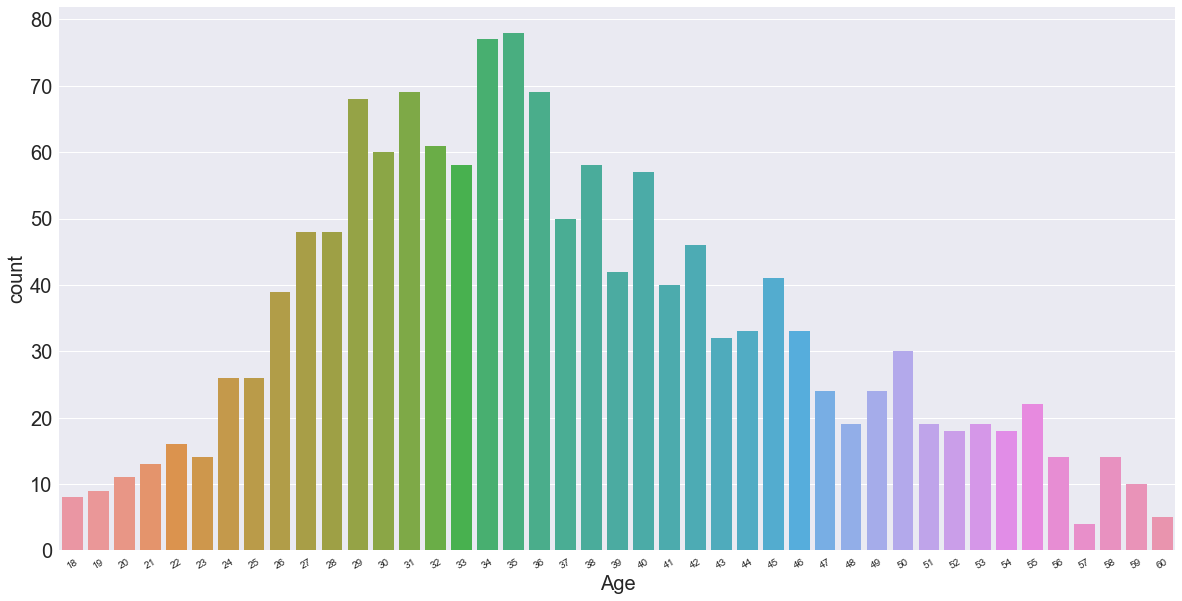

In [15]:
# age 분포 확인
plt.figure(figsize=(20,10))
sns.countplot(data=data_,x='Age')
plt.xticks(rotation=30)
plt.show()

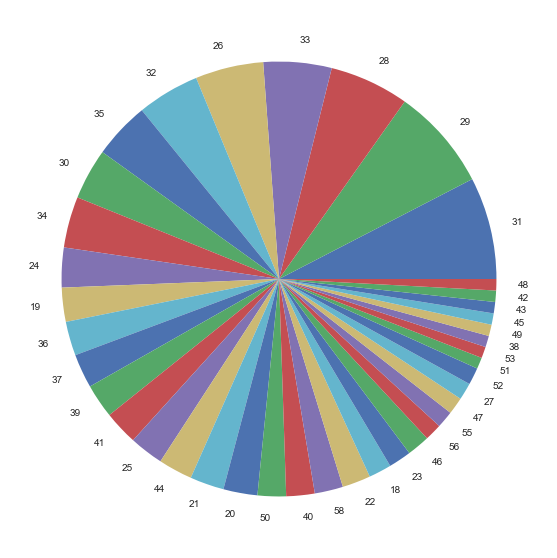

In [16]:
# 퇴사한 age 분포 확인
plt.figure(figsize=(10,10))
plt.pie(data_.loc[data_.Attrition==1,'Age'].value_counts(), labels=data_.loc[data_.Attrition==1,'Age'].value_counts().index)
plt.show()

- 28,29,31세의 퇴사율이 가장 높음

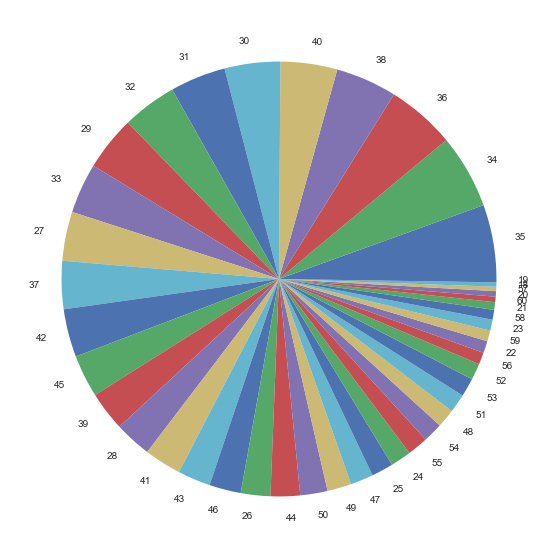

In [17]:
plt.figure(figsize=(10,10))
plt.pie(data_.loc[data_.Attrition==0,'Age'].value_counts(), labels=data_.loc[data_.Attrition==0,'Age'].value_counts().index)
plt.show()

In [18]:
# age_band 만들기
data_['Age_band'] = 0
data_.loc[data_['Age'] <= 25, 'Age_band'] = 0
data_.loc[(data_['Age'] > 25) & (data_['Age'] <= 33), 'Age_band'] = 1
data_.loc[(data_['Age'] > 33) & (data_['Age'] <= 41), 'Age_band'] = 2
data_.loc[(data_['Age'] > 42) & (data_['Age'] <= 49), 'Age_band'] = 3
data_.loc[data_['Age'] > 49, 'Age_band'] = 4
data_.head(5)

,Attrition,Age,Education,EducationField,Gender,MaritalStatus,NumCompaniesWorked,BeforeWorkingYears,Age_band
0,1.0,41,2,Life Sciences,Female,Single,8,2,2
1,0.0,49,1,Life Sciences,Male,Married,1,0,3
2,1.0,37,2,Other,Male,Single,6,7,2
3,0.0,33,4,Life Sciences,Female,Married,1,0,1
4,0.0,27,1,Medical,Male,Married,9,4,1


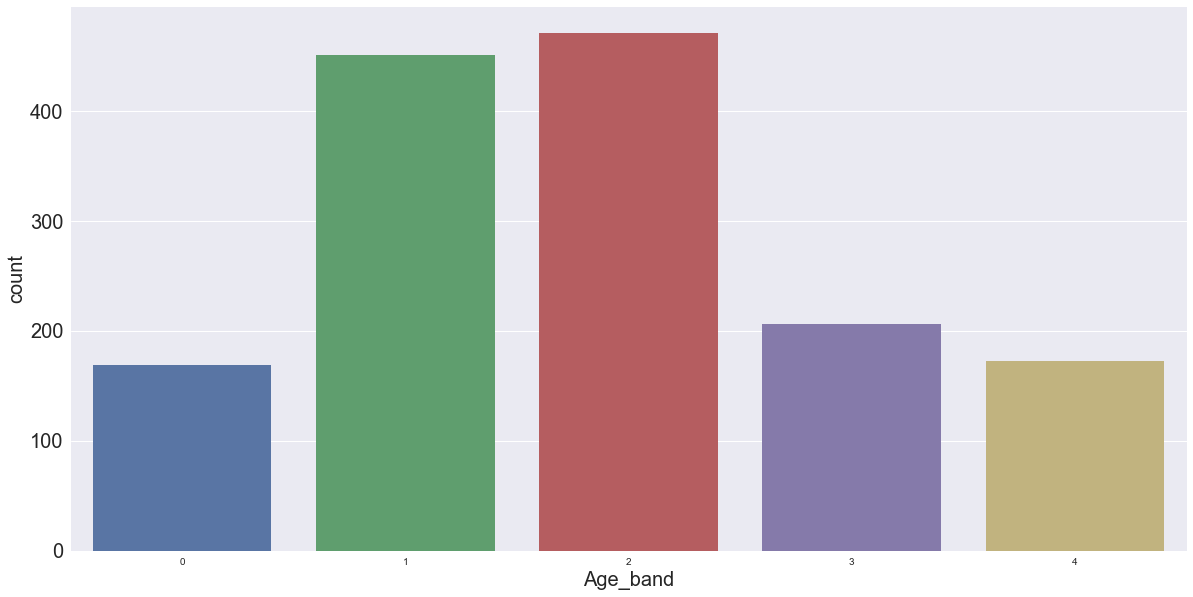

In [19]:
# band별 분포 확인
plt.figure(figsize=(20,10))
sns.countplot(data=data_,x='Age_band')
plt.show()

<AxesSubplot:xlabel='Age_band', ylabel='count'>

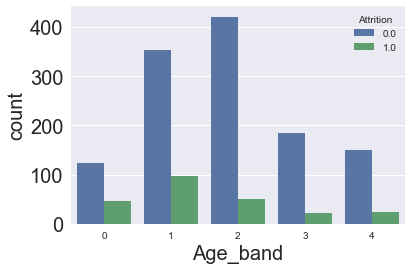

In [20]:
# age_band별 퇴사 인원
sns.countplot('Age_band', hue='Attrition', data=data_)

In [21]:
pd.crosstab(data_.Attrition,
            data_.Age_band, margins=True).style.background_gradient(
                cmap='summer_r')

Age_band,0,1,2,3,4,All
Attrition,,,,,,
0.0,123,354,421,185,150,1233
1.0,46,97,50,21,23,237
All,169,451,471,206,173,1470


- age band 1의 퇴사자 수가 많다

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

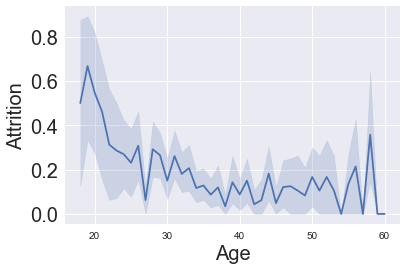

In [22]:
sns.lineplot('Age', 'Attrition', data=data_)

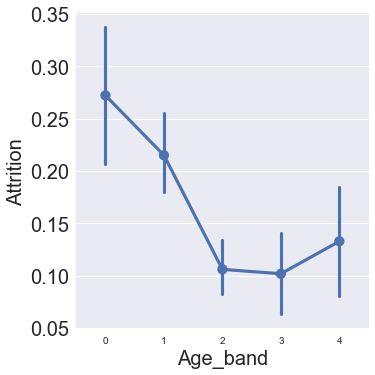

In [23]:
sns.factorplot(x='Age_band', y='Attrition',  data=data_)
plt.show()

In [24]:
print('Age_band 0의 퇴사율: ', data_[data_.Age_band==0].Attrition.mean())
print('Age_band 1의 퇴사율: ', data_[data_.Age_band==1].Attrition.mean())
print('Age_band 2의 퇴사율: ', data_[data_.Age_band==2].Attrition.mean())
print('Age_band 3의 퇴사율: ', data_[data_.Age_band==3].Attrition.mean())
print('Age_band 4의 퇴사율: ', data_[data_.Age_band==4].Attrition.mean())

Age_band 0의 퇴사율:  0.27218934911242604
Age_band 1의 퇴사율:  0.21507760532150777
Age_band 2의 퇴사율:  0.10615711252653928
Age_band 3의 퇴사율:  0.10194174757281553
Age_band 4의 퇴사율:  0.1329479768786127


- age band 0과 1의 퇴사율이 높다

- age band 1과 2, 즉 <b>26세 ~ 41세</b>가 가장 많은 수를 차지한다.
- 그 중 퇴사자가 가장 많은 구간은 <b>age_band 1(26세~33세)</b>이다.
- 인원 대비 퇴사율이 높은 구간은 <b>age_band 0(18세~25세)와 1(26세-33세)</b>이다.
- <b>age_band 1(26세~33세)</b>는 퇴사자 수도 많고 퇴사율도 높다 -> 집중관리 대상

## Education

1: 'Below College'   2: 'College'   3: 'Bachelor'   4: 'Master'   5: 'Doctor'

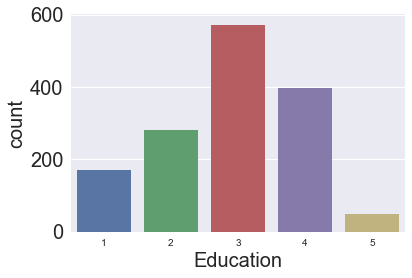

In [25]:
# 분포 확인
sns.countplot(data=data_, x='Education')
plt.show()

- 학/석사 인원이 많음

<AxesSubplot:xlabel='Education', ylabel='count'>

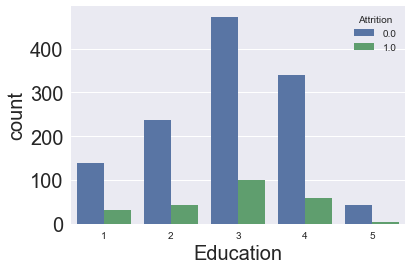

In [26]:
# 교육수준 별 퇴사 여부
sns.countplot('Education', hue='Attrition', data=data_)

In [27]:
pd.crosstab(data_.Attrition,
            data_.Education, margins=True).style.background_gradient(
                cmap='summer_r')

Education,1,2,3,4,5,All
Attrition,,,,,,
0.0,139,238,473,340,43,1233
1.0,31,44,99,58,5,237
All,170,282,572,398,48,1470


- 교육수준이 학사인 사람들이 많이 퇴사했다.

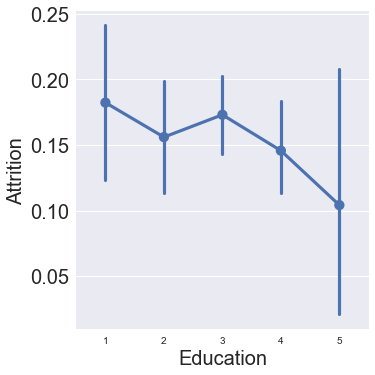

In [28]:
sns.factorplot(x='Education', y='Attrition',  data=data_)
plt.show()

In [29]:
print('Below College의 퇴사율: ', data_[data_.Education==1].Attrition.mean())
print('College의 퇴사율: ', data_[data_.Education==2].Attrition.mean())
print('Bachelor의 퇴사율: ', data_[data_.Education==3].Attrition.mean())
print('Master의 퇴사율: ', data_[data_.Education==4].Attrition.mean())
print('Doctor의 퇴사율: ', data_[data_.Education==5].Attrition.mean())

Below College의 퇴사율:  0.18235294117647058
College의 퇴사율:  0.15602836879432624
Bachelor의 퇴사율:  0.17307692307692307
Master의 퇴사율:  0.1457286432160804
Doctor의 퇴사율:  0.10416666666666667


- 대학생 이하, 학사의 교육수준을 가진 사람들의 퇴사율이 높다
- 그러나 비율차이가 크지 않음

## Education Field

In [30]:
data_.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

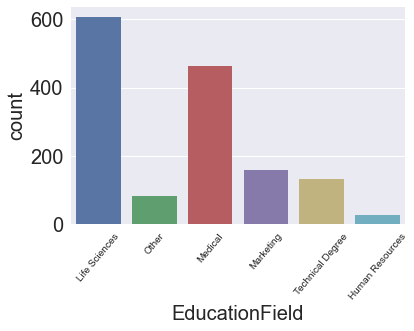

In [31]:
# 분포 확인
sns.countplot(data=data_, x='EducationField')
plt.xticks(rotation=50)
plt.show()

<b>1=Human Resources, 2=Marketing, 3=Life Sciences, 4=Medical, 5=Technical Degree, 6=Other</b>로 변환

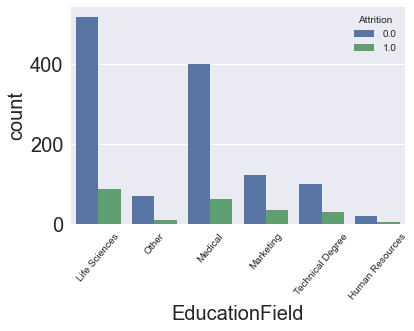

In [32]:
# 교육 분야 별 퇴사 여부
sns.countplot('EducationField', hue='Attrition', data=data_)
plt.xticks(rotation=50)
plt.show()

In [33]:
pd.crosstab(data_.Attrition,
            data_.EducationField, margins=True).style.background_gradient(
                cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Attrition,,,,,,,
0.0,20,517,124,401,71,100,1233
1.0,7,89,35,63,11,32,237
All,27,606,159,464,82,132,1470


- 교육수준이 생명과학인 사람들이 많이 퇴사했다.

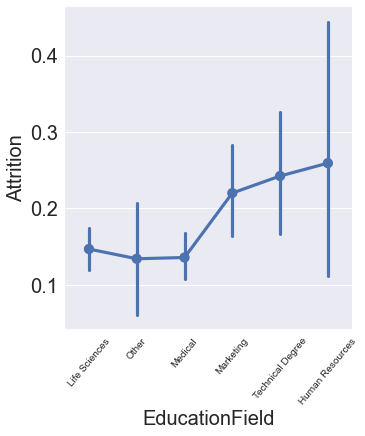

In [34]:
sns.factorplot(x='EducationField', y='Attrition',  data=data_)
plt.xticks(rotation=50)
plt.show()

In [35]:
print('Human Resources의 퇴사율: ', data_[data_.EducationField=='Human Resources'].Attrition.mean())
print('Life Sciences의 퇴사율: ', data_[data_.EducationField=='Life Sciences'].Attrition.mean())
print('Marketing의 퇴사율: ', data_[data_.EducationField=='Marketing'].Attrition.mean())
print('Medical의 퇴사율: ', data_[data_.EducationField=='Medical'].Attrition.mean())
print('Technical Degree의 퇴사율: ', data_[data_.EducationField=='Technical Degree'].Attrition.mean())
print('Other의 퇴사율: ', data_[data_.EducationField=='Other'].Attrition.mean())

Human Resources의 퇴사율:  0.25925925925925924
Life Sciences의 퇴사율:  0.14686468646864687
Marketing의 퇴사율:  0.22012578616352202
Medical의 퇴사율:  0.13577586206896552
Technical Degree의 퇴사율:  0.24242424242424243
Other의 퇴사율:  0.13414634146341464


- HR, Technical Degree, Marketing의 퇴사율이 높다

## Gender

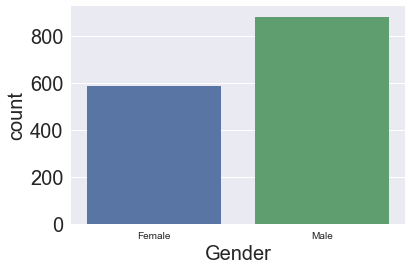

In [36]:
# 분포 확인
sns.countplot(data=data_, x='Gender')
plt.show()

- 남성이 많음

<AxesSubplot:xlabel='Gender', ylabel='count'>

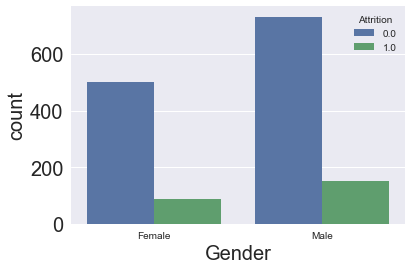

In [37]:
# 성별 별 퇴사 여부
sns.countplot('Gender', hue='Attrition', data=data_)

In [38]:
pd.crosstab(data_.Attrition,
            data_.Gender, margins=True).style.background_gradient(
                cmap='summer_r')

Gender,Female,Male,All
Attrition,,,
0.0,501,732,1233
1.0,87,150,237
All,588,882,1470


- 남성이 많이 퇴사했다.

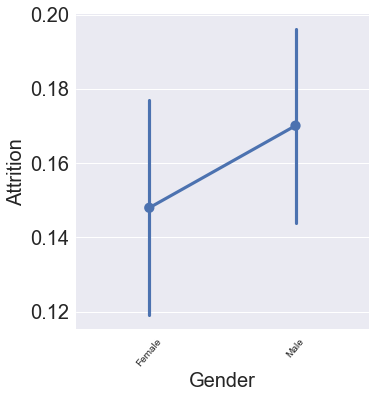

In [39]:
sns.factorplot(x='Gender', y='Attrition',  data=data_)
plt.xticks(rotation=50)
plt.show()

In [40]:
print('남성의 퇴사율: ', data_[data_.Gender=='Male'].Attrition.mean())
print('여성의 퇴사율: ', data_[data_.Gender=='Female'].Attrition.mean())

남성의 퇴사율:  0.17006802721088435
여성의 퇴사율:  0.14795918367346939


- 차이 없음 / 별 의미 없는 듯

## Marital Status

In [41]:
data_.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

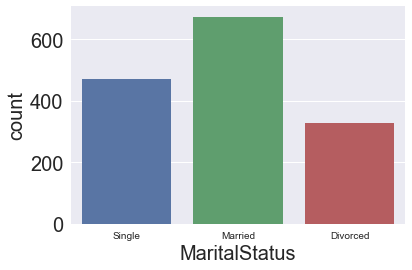

In [42]:
# 분포 확인
sns.countplot(data=data_, x='MaritalStatus')
plt.show()

- 기혼자의 수가 많다

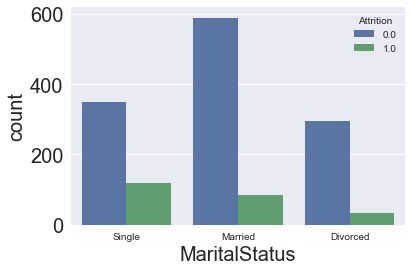

In [43]:
# 결혼상태 별 퇴사 여부
sns.countplot('MaritalStatus', hue='Attrition', data=data_)
plt.show()

In [44]:
pd.crosstab(data_.Attrition,
            data_.MaritalStatus, margins=True).style.background_gradient(
                cmap='summer_r')

MaritalStatus,Divorced,Married,Single,All
Attrition,,,,
0.0,294,589,350,1233
1.0,33,84,120,237
All,327,673,470,1470


- 미혼의 퇴사 수가 가장 많다!!

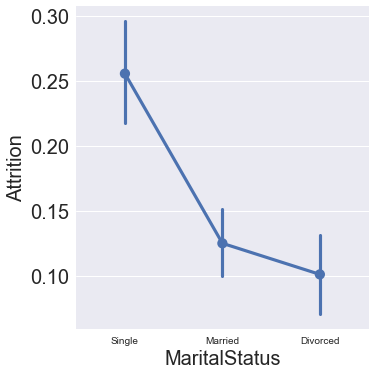

In [45]:
sns.factorplot(x='MaritalStatus', y='Attrition',  data=data_)
plt.show()

In [46]:
print('미혼의 퇴사율: ', data_[data_.MaritalStatus=='Single'].Attrition.mean())
print('기혼의 퇴사율: ', data_[data_.MaritalStatus=='Married'].Attrition.mean())
print('이혼의 퇴사율: ', data_[data_.MaritalStatus=='Divorced'].Attrition.mean())

미혼의 퇴사율:  0.2553191489361702
기혼의 퇴사율:  0.12481426448736999
이혼의 퇴사율:  0.10091743119266056


- 미혼의 1/4이 퇴사함!!

## NumCompaniesWorked

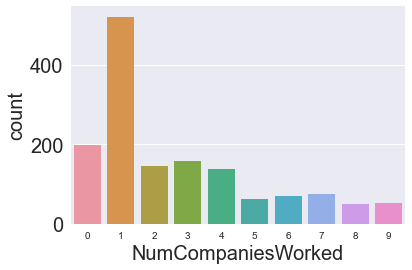

In [47]:
# 분포 확인
sns.countplot(data=data_, x='NumCompaniesWorked')
plt.show()

- 전에 하나의 회사에서 일하거나, 전 회사가 없는 사람이 많음

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

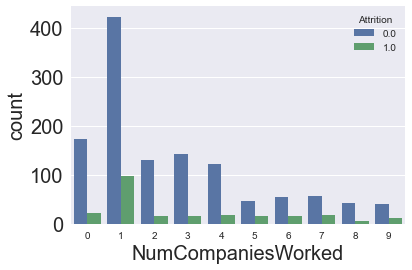

In [48]:
# 일한 회사 수 별 퇴사 여부
sns.countplot('NumCompaniesWorked', hue='Attrition', data=data_)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

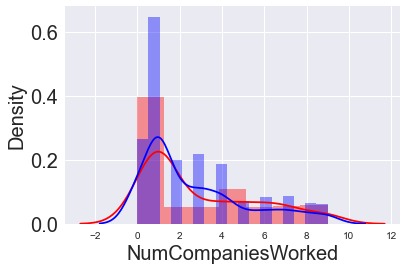

In [49]:
sns.distplot(data_[data_['Attrition'] == 1].NumCompaniesWorked, color='r')
sns.distplot(data_[data_['Attrition'] == 0].NumCompaniesWorked, color='b')

In [50]:
pd.crosstab(data_.Attrition,
            data_.NumCompaniesWorked, margins=True).style.background_gradient(
                cmap='summer_r')

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9,All
Attrition,,,,,,,,,,,
0.0,174,423,130,143,122,47,54,57,43,40,1233
1.0,23,98,16,16,17,16,16,17,6,12,237
All,197,521,146,159,139,63,70,74,49,52,1470


- 1개의 회사에서 일해봤던 사람들이 많이 퇴사했다

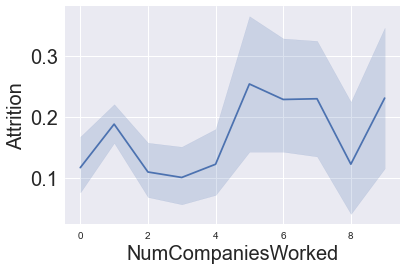

In [51]:
sns.lineplot(x='NumCompaniesWorked', y='Attrition',  data=data_)
plt.show()

In [52]:
print('0의 퇴사율: ', data_[data_.NumCompaniesWorked==0].Attrition.mean())
print('1의 퇴사율: ', data_[data_.NumCompaniesWorked==1].Attrition.mean())
print('2의 퇴사율: ', data_[data_.NumCompaniesWorked==2].Attrition.mean())
print('3의 퇴사율: ', data_[data_.NumCompaniesWorked==3].Attrition.mean())
print('4의 퇴사율: ', data_[data_.NumCompaniesWorked==4].Attrition.mean())
print('5의 퇴사율: ', data_[data_.NumCompaniesWorked==5].Attrition.mean())
print('6의 퇴사율: ', data_[data_.NumCompaniesWorked==6].Attrition.mean())
print('7의 퇴사율: ', data_[data_.NumCompaniesWorked==7].Attrition.mean())
print('8의 퇴사율: ', data_[data_.NumCompaniesWorked==8].Attrition.mean())
print('9의 퇴사율: ', data_[data_.NumCompaniesWorked==9].Attrition.mean())

0의 퇴사율:  0.116751269035533
1의 퇴사율:  0.18809980806142035
2의 퇴사율:  0.1095890410958904
3의 퇴사율:  0.10062893081761007
4의 퇴사율:  0.1223021582733813
5의 퇴사율:  0.25396825396825395
6의 퇴사율:  0.22857142857142856
7의 퇴사율:  0.22972972972972974
8의 퇴사율:  0.12244897959183673
9의 퇴사율:  0.23076923076923078


- 5,6,7,9의 퇴사율이 유의미하게 높음
- 많은 회사 다녀봤을수록 많이 관두는 듯 ==> 이미 퇴사 경험이 있는 사람들은 더 많이 탈주한다?

## BeforeWorkingYears (TotalWorkingYears - YearsAtCompany)

In [53]:
data_.BeforeWorkingYears.describe()

count    1470.000000
mean        4.271429
std         6.179783
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        33.000000
Name: BeforeWorkingYears, dtype: float64

In [54]:
np.sort(data_.BeforeWorkingYears.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33],
      dtype=int64)

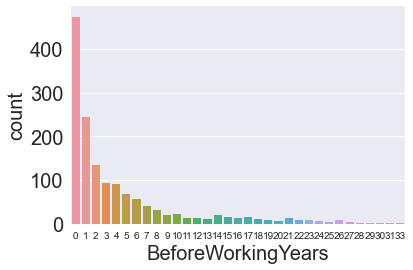

In [55]:
# 분포 확인
sns.countplot(data=data_, x='BeforeWorkingYears')
plt.show()

- 전에 하나의 회사에서 일하거나, 전 회사가 없는 사람이 많음

In [56]:
# BeforeWorkingYears_band 만들기
data_['BeforeWorkingYears_band'] = 0
data_.loc[data_['BeforeWorkingYears'] <= 5, 'BeforeWorkingYears_band'] = 0
data_.loc[(data_['BeforeWorkingYears'] > 5) & (data_['BeforeWorkingYears'] <= 10), 'BeforeWorkingYears_band'] = 1
data_.loc[(data_['BeforeWorkingYears'] > 10) & (data_['BeforeWorkingYears'] <= 15), 'BeforeWorkingYears_band'] = 2
data_.loc[(data_['BeforeWorkingYears'] > 15) & (data_['BeforeWorkingYears'] <= 20), 'BeforeWorkingYears_band'] = 3
data_.loc[(data_['BeforeWorkingYears'] > 20) & (data_['BeforeWorkingYears'] <= 25), 'BeforeWorkingYears_band'] = 4
data_.loc[data_['BeforeWorkingYears'] > 25, 'BeforeWorkingYears_band'] = 5
data_.head(5)

,Attrition,Age,Education,EducationField,Gender,MaritalStatus,NumCompaniesWorked,BeforeWorkingYears,Age_band,BeforeWorkingYears_band
0,1.0,41,2,Life Sciences,Female,Single,8,2,2,0
1,0.0,49,1,Life Sciences,Male,Married,1,0,3,0
2,1.0,37,2,Other,Male,Single,6,7,2,1
3,0.0,33,4,Life Sciences,Female,Married,1,0,1,0
4,0.0,27,1,Medical,Male,Married,9,4,1,0


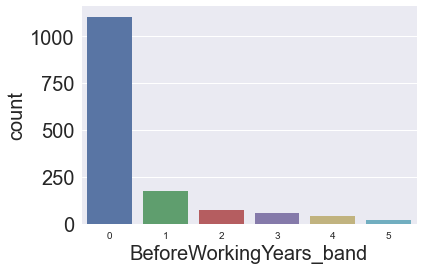

In [57]:
# 분포 확인
sns.countplot(data=data_, x='BeforeWorkingYears_band')
plt.show()

<AxesSubplot:xlabel='BeforeWorkingYears_band', ylabel='count'>

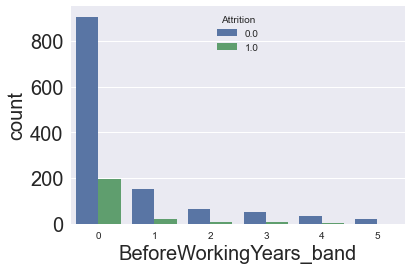

In [58]:
# 경력 별 퇴사 여부
sns.countplot('BeforeWorkingYears_band', hue='Attrition', data=data_)

- 경력이 5년 이하인 사람이 가장 많다

In [59]:
pd.crosstab(data_.Attrition,
            data_.BeforeWorkingYears_band, margins=True).style.background_gradient(
                cmap='summer_r')

BeforeWorkingYears_band,0,1,2,3,4,5,All
Attrition,,,,,,,
0.0,906,153,66,50,36,22,1233
1.0,198,20,8,7,4,0,237
All,1104,173,74,57,40,22,1470


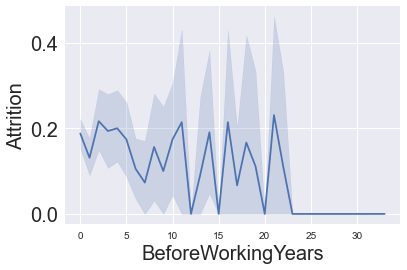

In [60]:
sns.lineplot(x='BeforeWorkingYears', y='Attrition',  data=data_)
plt.show()

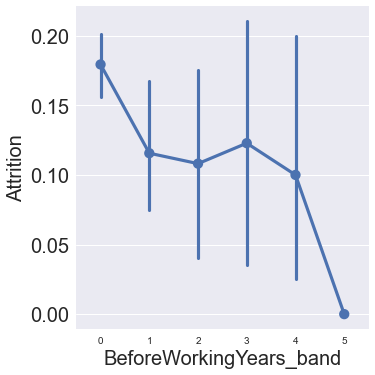

In [61]:
sns.factorplot(x='BeforeWorkingYears_band', y='Attrition',  data=data_)
plt.show()

In [62]:
print('BeforeWorkingYears_band 0의 퇴사율: ', data_[data_.BeforeWorkingYears_band==0].Attrition.mean())
print('BeforeWorkingYears_band 1의 퇴사율: ', data_[data_.BeforeWorkingYears_band==1].Attrition.mean())
print('BeforeWorkingYears_band 2의 퇴사율: ', data_[data_.BeforeWorkingYears_band==2].Attrition.mean())
print('BeforeWorkingYears_band 3의 퇴사율: ', data_[data_.BeforeWorkingYears_band==3].Attrition.mean())
print('BeforeWorkingYears_band 4의 퇴사율: ', data_[data_.BeforeWorkingYears_band==4].Attrition.mean())
print('BeforeWorkingYears_band 5의 퇴사율: ', data_[data_.BeforeWorkingYears_band==5].Attrition.mean())

BeforeWorkingYears_band 0의 퇴사율:  0.1793478260869565
BeforeWorkingYears_band 1의 퇴사율:  0.11560693641618497
BeforeWorkingYears_band 2의 퇴사율:  0.10810810810810811
BeforeWorkingYears_band 3의 퇴사율:  0.12280701754385964
BeforeWorkingYears_band 4의 퇴사율:  0.1
BeforeWorkingYears_band 5의 퇴사율:  0.0


- 경력이 5년 이하인 직원들의 퇴사율이 높다

## 두 개씩 묶어서

### Age

<AxesSubplot:xlabel='Education', ylabel='Age'>

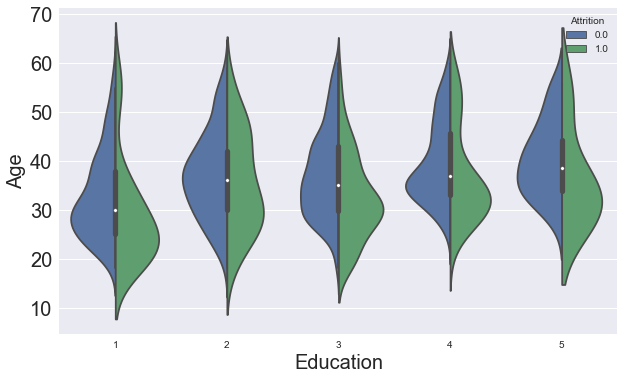

In [79]:
# Education
plt.figure(figsize=(10,6))
sns.violinplot('Education', 'Age', hue='Attrition', data=data_, split=True)

- education에 관계 없이 나이가 많을수록 퇴사를 많이 함

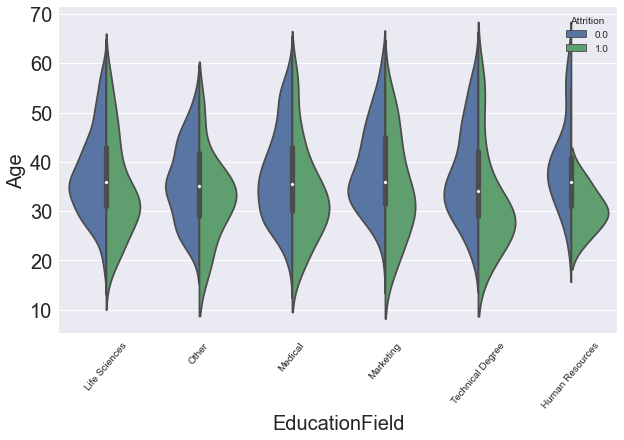

In [78]:
# Education Field
plt.figure(figsize=(10,6))
sns.violinplot('EducationField', 'Age', hue='Attrition', data=data_, split=True)
plt.xticks(rotation=50)
plt.show()

- 마찬가지로 age가 낮을수록 퇴사 많음! 
- 그리고 medical, Technical, medical이 특히 그럼

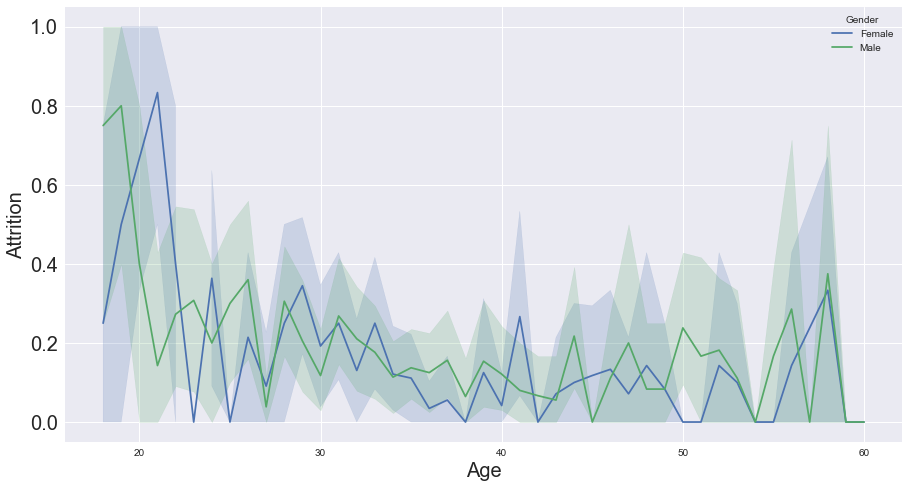

In [85]:
# Gender
plt.figure(figsize=(15,8))
sns.lineplot('Age', 'Attrition', hue='Gender', data=data_)
plt.show()

- 역시 나이가 어릴수록 퇴사율↑ 외에는 큰 의미 없어보임

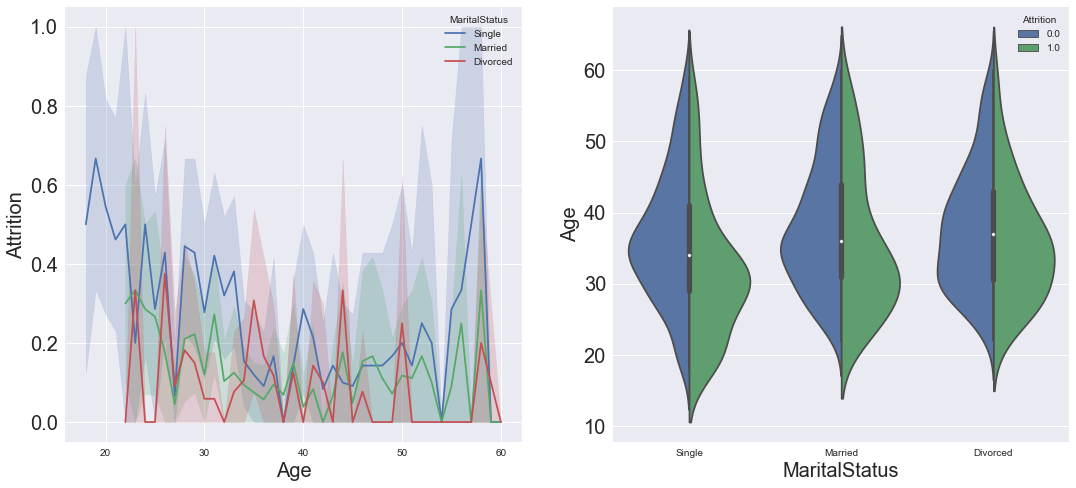

In [89]:
# Marital Status
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Age', 'Attrition', hue='MaritalStatus', data=data_, ax=ax[0])
sns.violinplot('MaritalStatus', 'Age', hue='Attrition', data=data_, split=True, ax=ax[1])
plt.show()

<AxesSubplot:xlabel='Age_band', ylabel='count'>

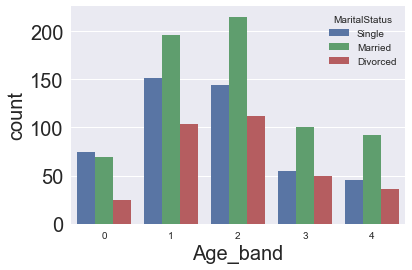

In [149]:
sns.countplot('Age_band', hue='MaritalStatus', data=data_)

- 특히 single & 어린 사람들이 퇴사율이 높음

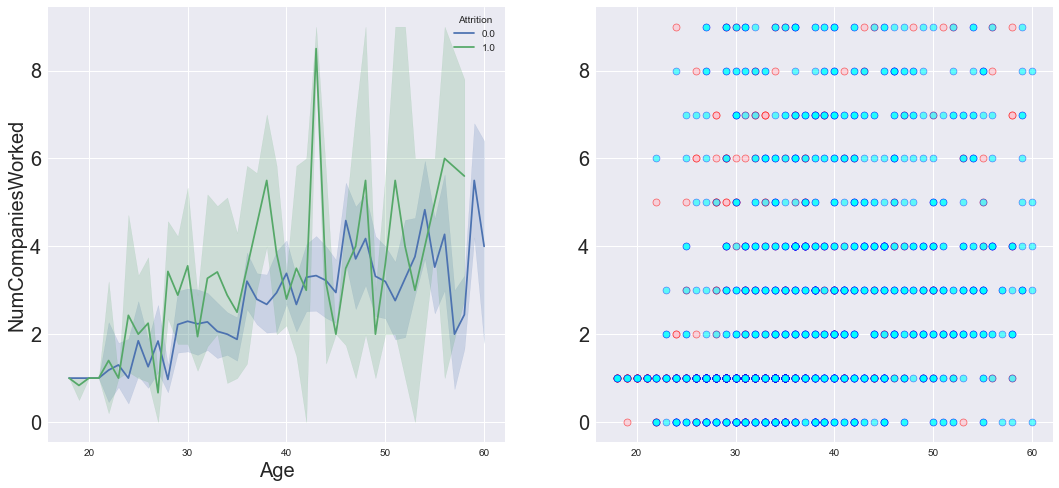

In [102]:
# NumCompaniesWorked
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Age', 'NumCompaniesWorked', hue='Attrition', data=data_, ax=ax[0])
plt.scatter(data_.loc[data_.Attrition==1,'Age'], data_.loc[data_.Attrition==1,'NumCompaniesWorked'], c = 'pink', alpha = 0.6, 
            linewidths = 0.7, edgecolors = 'red', label = '퇴사')
plt.scatter(data_.loc[data_.Attrition==0,'Age'], data_.loc[data_.Attrition==0,'NumCompaniesWorked'], c = 'cyan', alpha = 0.6, 
            linewidths = 0.5, edgecolors = 'blue', label = '재직')
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Age'>

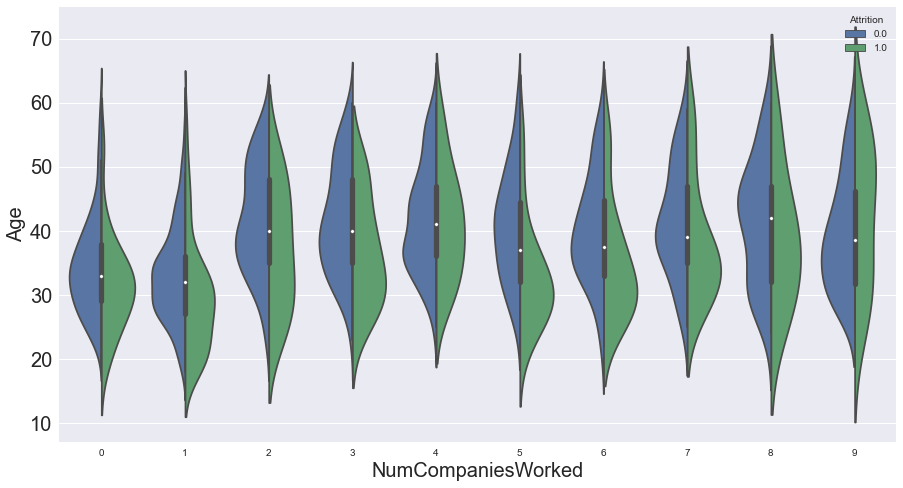

In [118]:
plt.figure(figsize=(15,8))
sns.violinplot('NumCompaniesWorked', 'Age', hue='Attrition', data=data_, split=True)

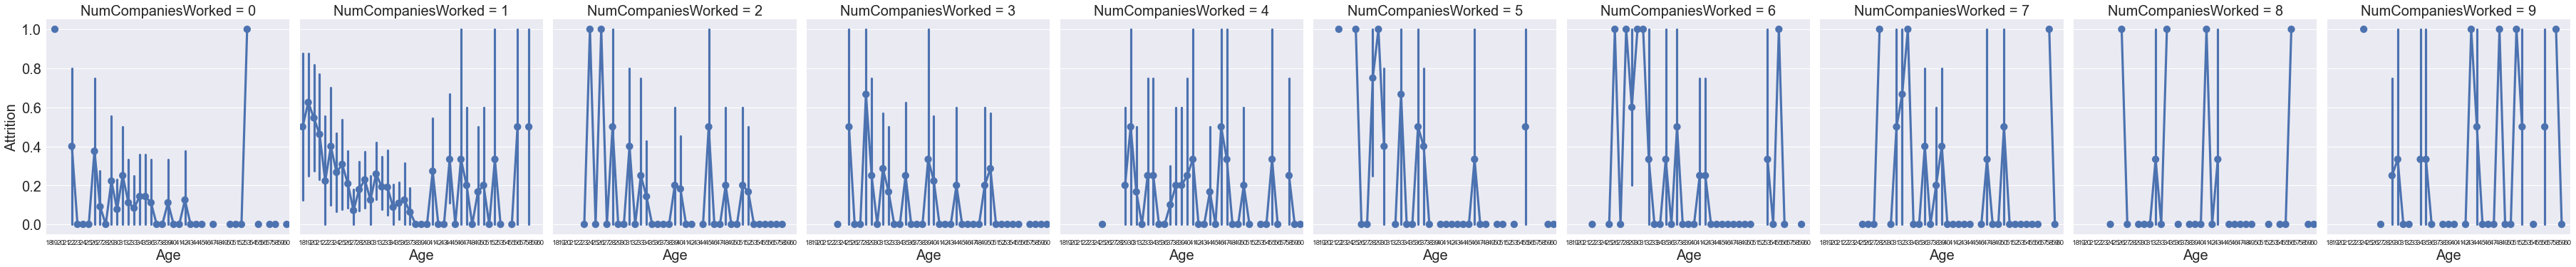

In [121]:
sns.factorplot('Age', 'Attrition', col='NumCompaniesWorked', data=data_)

- 많은 회사를 다녀본 사람들이 퇴사를 많이 함
- 여기에 age는 큰 의미 없는 듯

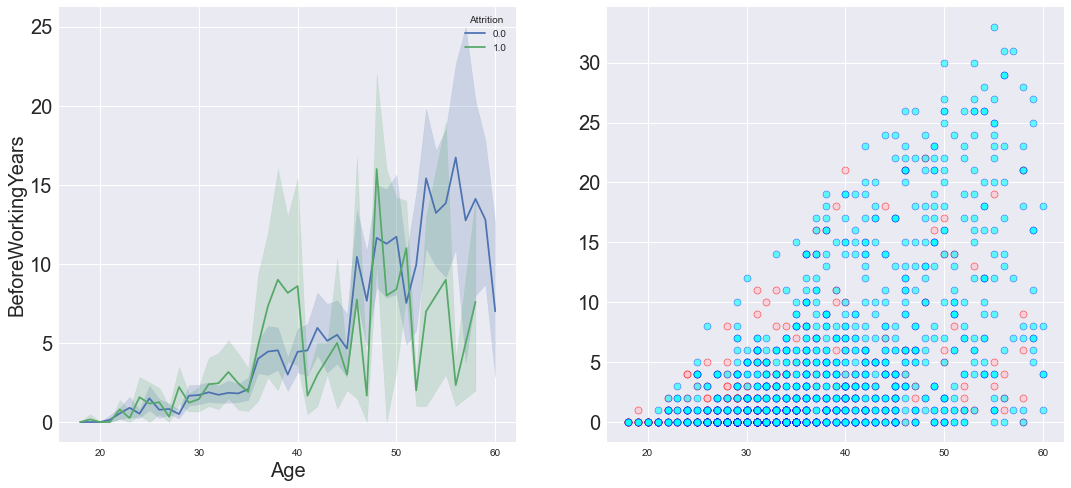

In [122]:
# BeforeWorkingYears
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Age', 'BeforeWorkingYears', hue='Attrition', data=data_, ax=ax[0])
plt.scatter(data_.loc[data_.Attrition==1,'Age'], data_.loc[data_.Attrition==1,'BeforeWorkingYears'], c = 'pink', alpha = 0.6, 
            linewidths = 0.7, edgecolors = 'red', label = '퇴사')
plt.scatter(data_.loc[data_.Attrition==0,'Age'], data_.loc[data_.Attrition==0,'BeforeWorkingYears'], c = 'cyan', alpha = 0.6, 
            linewidths = 0.5, edgecolors = 'blue', label = '재직')

Text(0, 0.5, 'BeforeWorkingYears')

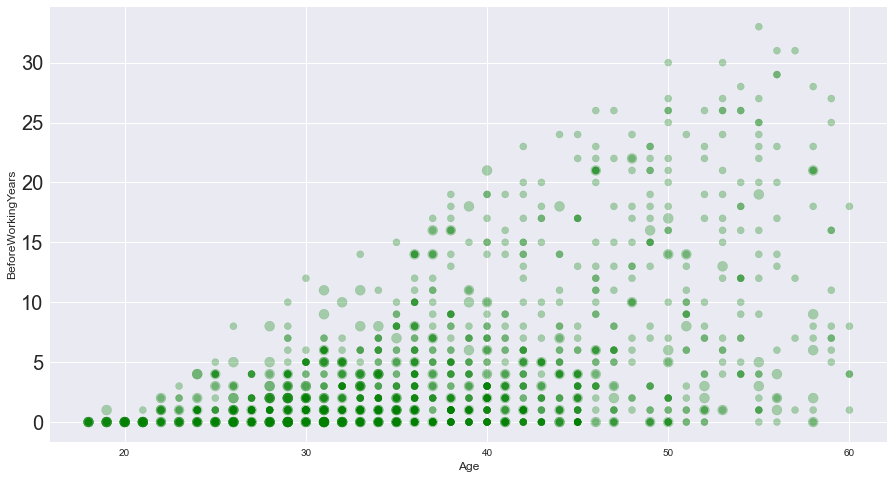

In [135]:
plt.figure(figsize=(15,8))
plt.scatter(data_['Age'], # x축
            data_['BeforeWorkingYears'], # y축
            s = (data_['Attrition']+1)*50, # 사이즈
            c = 'green', # 색깔(고정)
            alpha = 0.3) # 투명도
plt.xlabel('Age', size = 12)
plt.ylabel('BeforeWorkingYears', size = 12)

- 어리고 경력이 적은 사람들이 많이 퇴사함

### Education

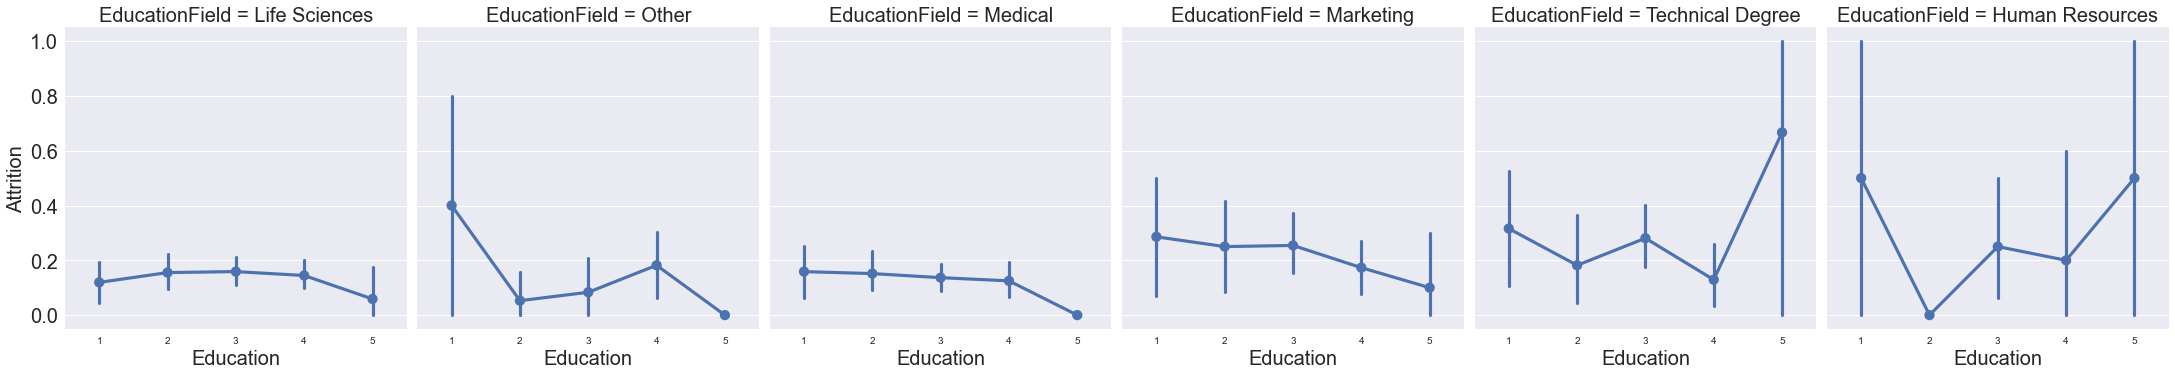

In [141]:
# Education Field
sns.factorplot('Education', 'Attrition', col='EducationField', data=data_)

- Technical과 HR은 박사학위인 사람들의 퇴사율이 높다
- 그 이외에는 큰 관련성 없어보임

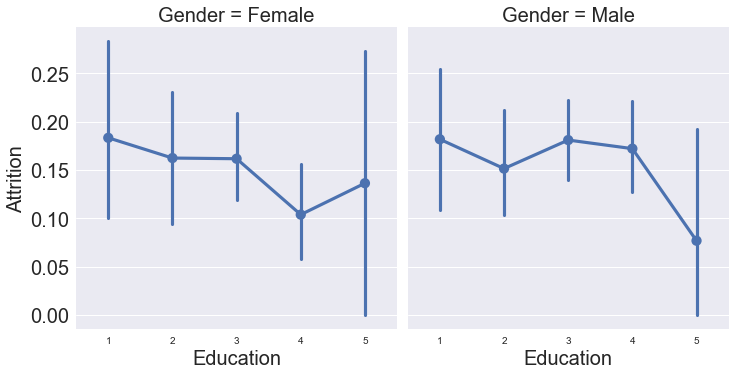

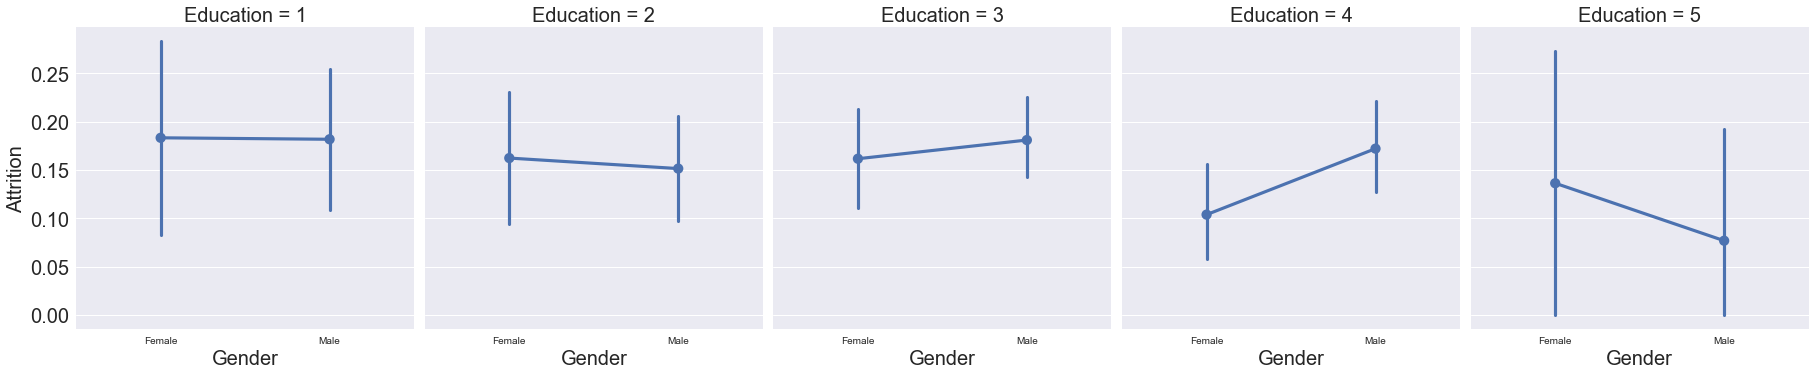

In [144]:
# Gender
sns.factorplot('Education', 'Attrition', col='Gender', data=data_)
sns.factorplot('Gender', 'Attrition', col='Education', data=data_)

- 남녀 상관 없이 저학력자들이 퇴사율 높음
- 석사학위는 남성이, 박사학위는 여성이 퇴사율이 더 높음

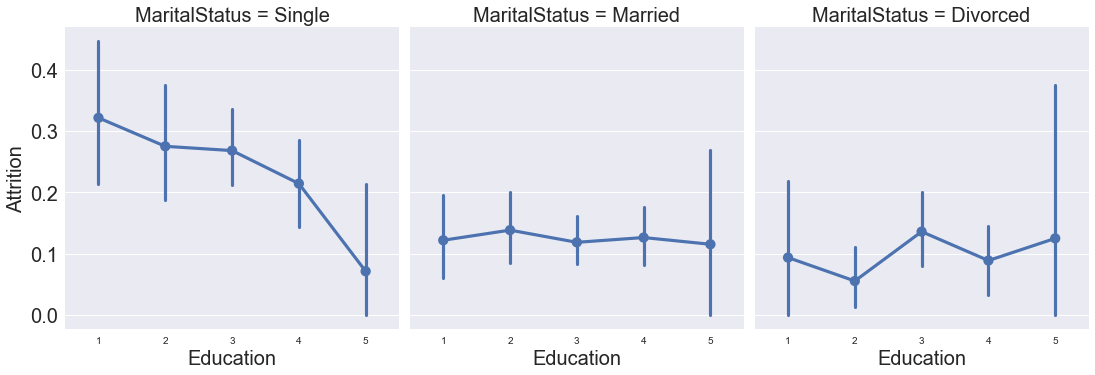

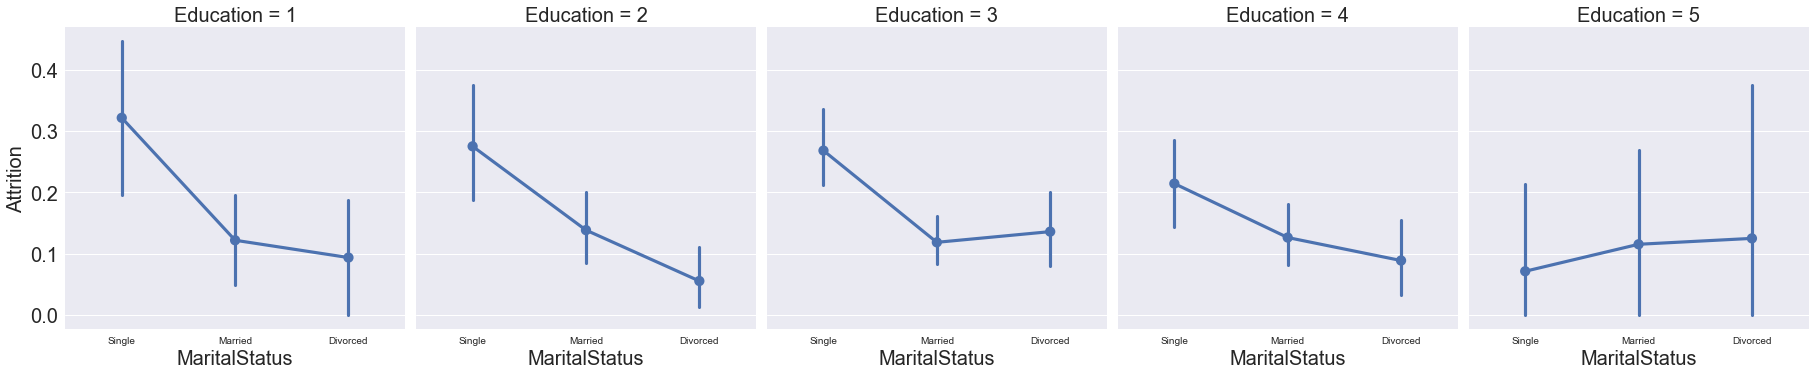

In [145]:
# MaritalStatus
sns.factorplot('Education', 'Attrition', col='MaritalStatus', data=data_)
sns.factorplot('MaritalStatus', 'Attrition', col='Education', data=data_)

- 대부분의 학력에서 single이 퇴사율 높음
- 특히 저학력 & single이 상대적으로 퇴사율 매우 높음
- married와 Divorced는 상대적으로 안정적 => 이것은 이들이 연령대가 높은 것과 관련 있는 것일듯

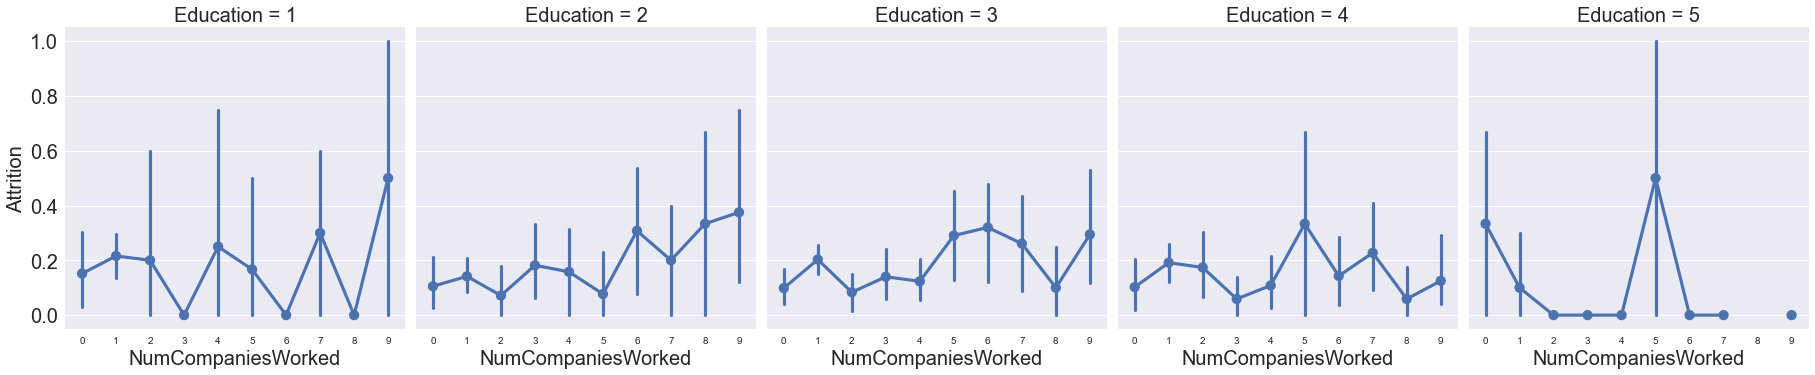

In [152]:
# NumCompaniesWorked
sns.factorplot('NumCompaniesWorked', 'Attrition', col='Education', data=data_)

- 대학 이하의 학력 & 다녔던 회사 수↑인 사람들의 퇴사율이 높음

<AxesSubplot:xlabel='BeforeWorkingYears_band', ylabel='count'>

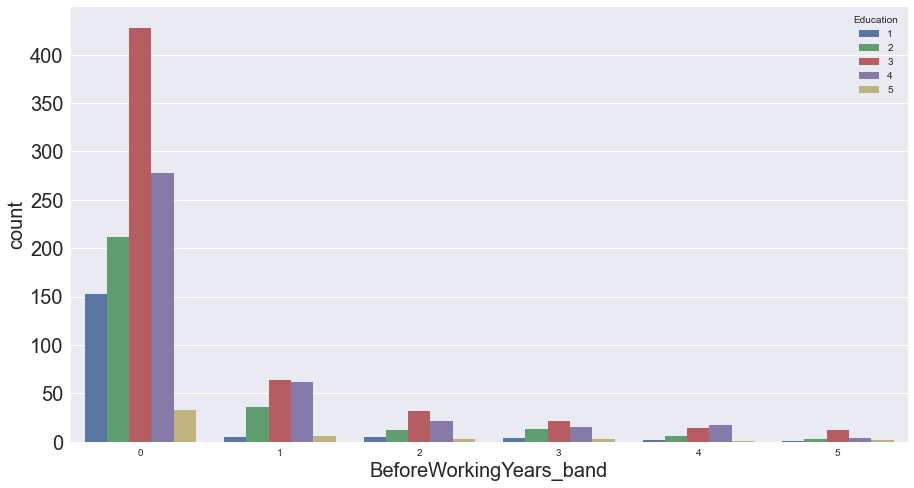

In [169]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='Education', data=data_)

- 전체적으로 분포는 비슷함

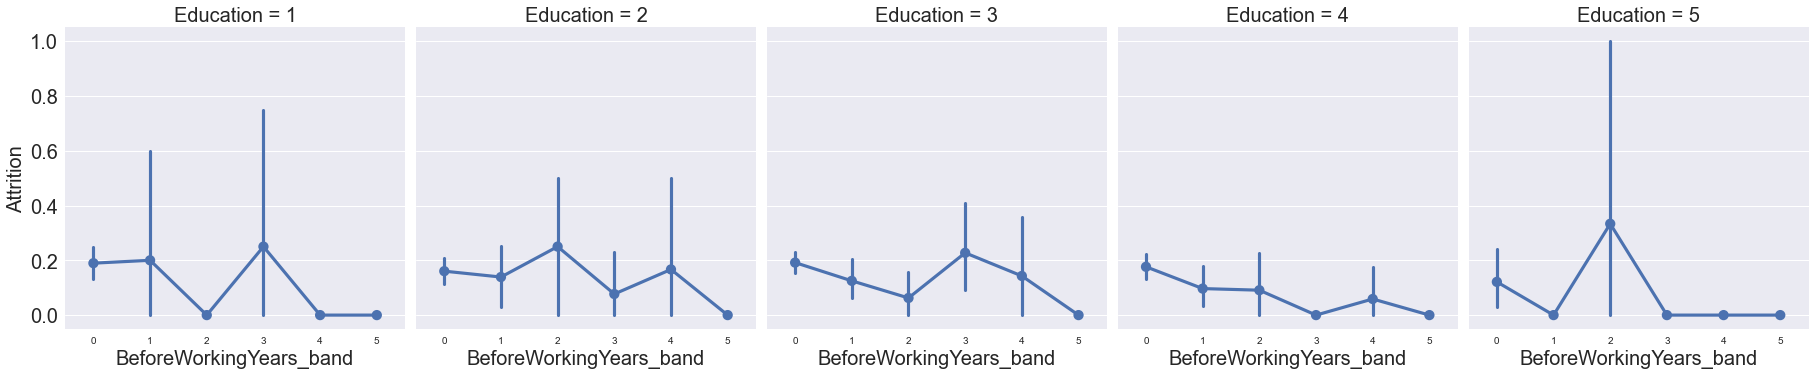

In [167]:
sns.factorplot('BeforeWorkingYears_band', 'Attrition', col='Education', data=data_)

- 경력이 적을수록 퇴사율 높음
- Education은 큰 관계 없는 듯

### EducationField

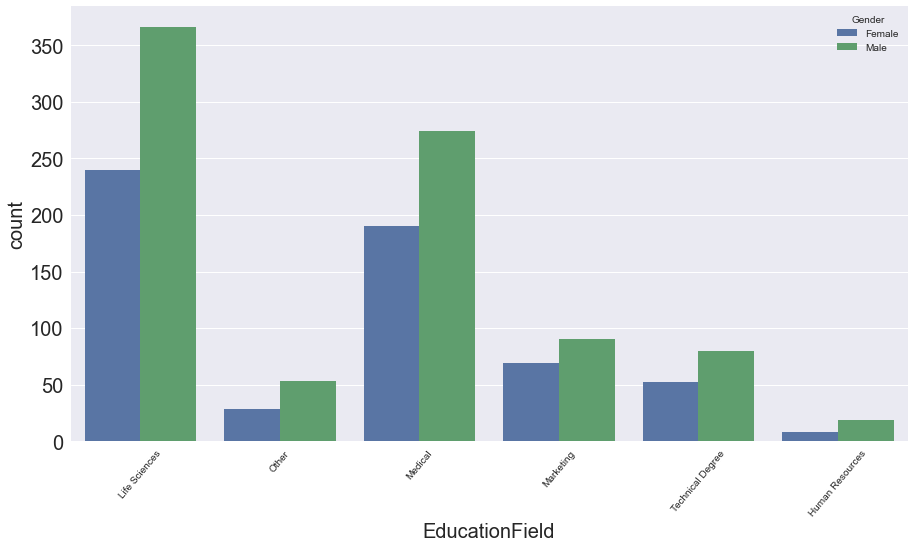

In [180]:
# Gender
plt.figure(figsize=(15,8))
sns.countplot('EducationField', hue='Gender', data=data_)
plt.xticks(rotation=50)
plt.show()

- Life Sciences, Medical 제외하고는 전체적으로 분포 비슷함

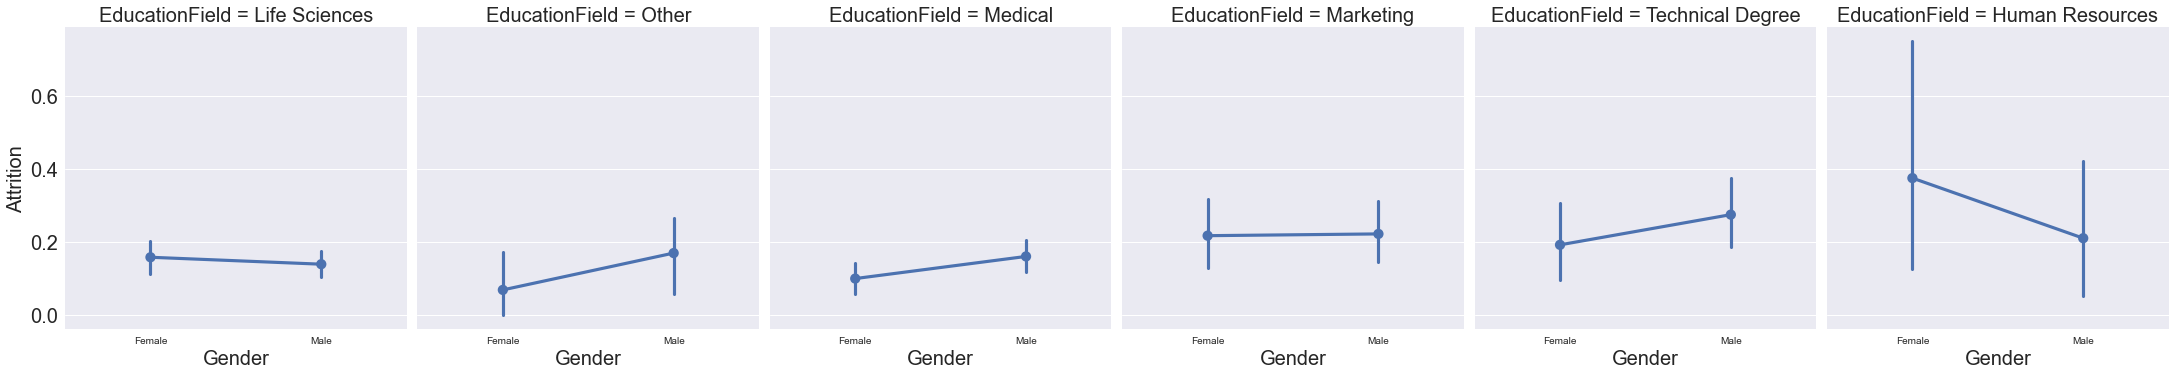

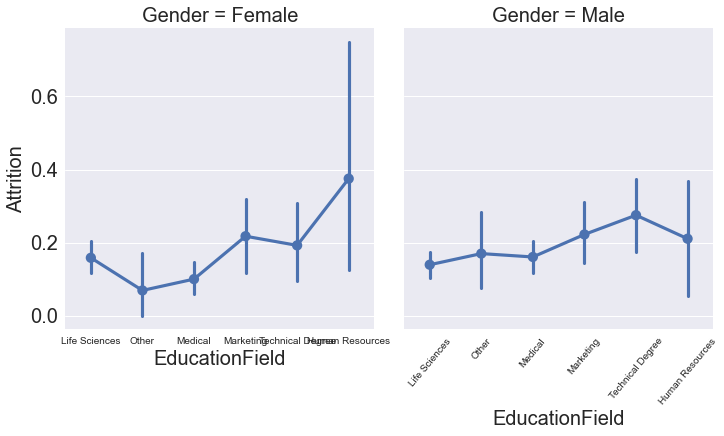

In [179]:
# Gender
sns.factorplot('Gender', 'Attrition', col='EducationField', data=data_,ax=ax[0])
sns.factorplot('EducationField', 'Attrition', col='Gender', data=data_,ax=ax[1])
plt.xticks(rotation=50)

plt.show()

- HR 여성의 퇴사율이 눈에 띄게 높음

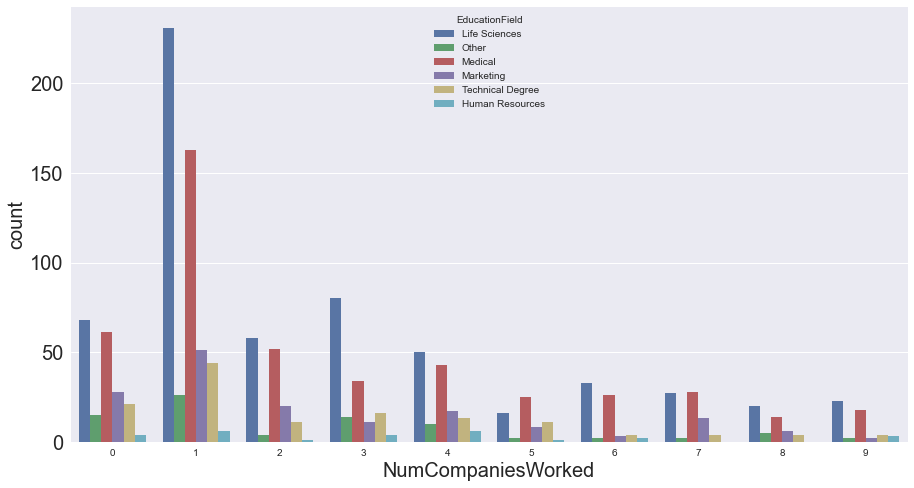

In [182]:
# NumCompaniesWorked
plt.figure(figsize=(15,8))
sns.countplot('NumCompaniesWorked', hue='EducationField', data=data_)
plt.show()

- 분포 유사함
- 전에 다닌 회사가 하나인 생명과학, 의학 전공 사람들이 매우 많음

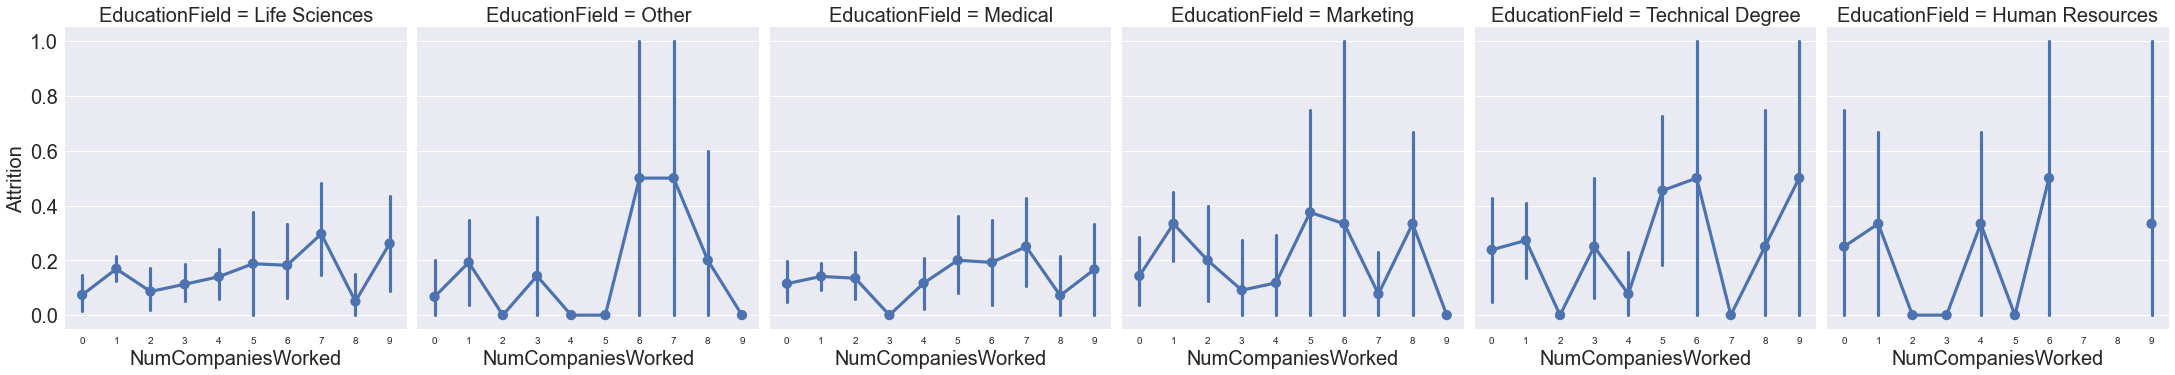

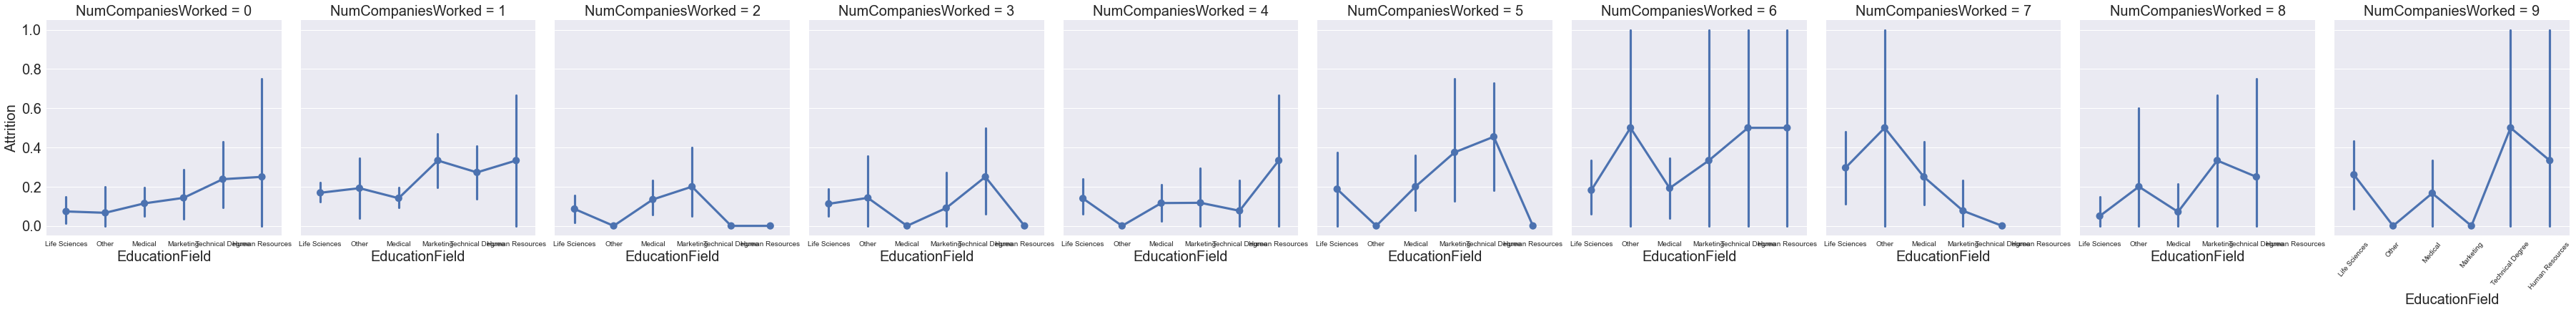

In [183]:
sns.factorplot('NumCompaniesWorked', 'Attrition', col='EducationField', data=data_)
sns.factorplot('EducationField', 'Attrition', col='NumCompaniesWorked', data=data_)
plt.xticks(rotation=50)
plt.show()

- 대부분의 전공들이 전에 다닌 회사 수가 많아질수록 퇴사율 높아짐

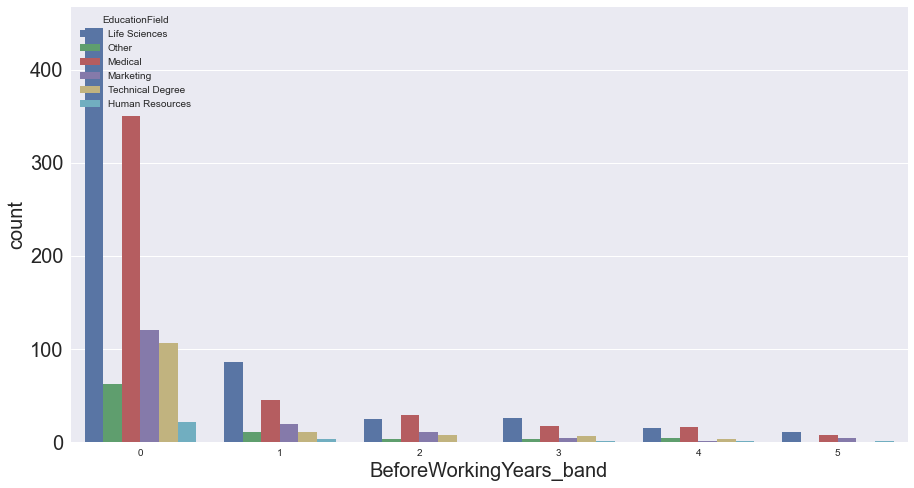

In [185]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='EducationField', data=data_)
plt.show()

- 마찬가지로 분포 유사

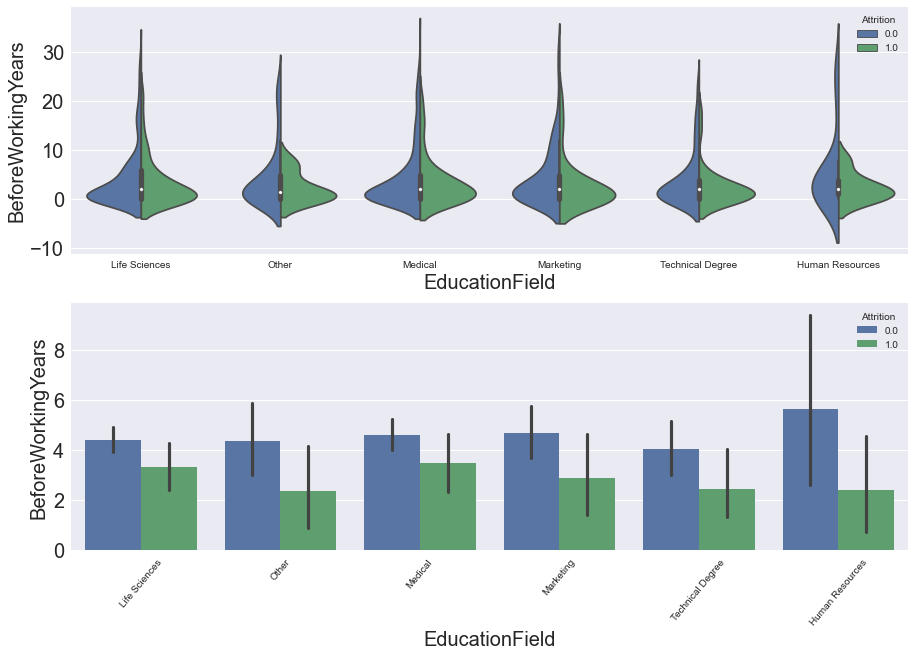

In [196]:
f, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.violinplot('EducationField', 'BeforeWorkingYears', hue='Attrition', data=data_, split=True,ax=ax[0])
sns.barplot('EducationField', 'BeforeWorkingYears', hue='Attrition', data=data_,ax=ax[1])
plt.xticks(rotation=50)
plt.show()

- 모든 분야에서 퇴사자의 경력이 낮음

### Gender

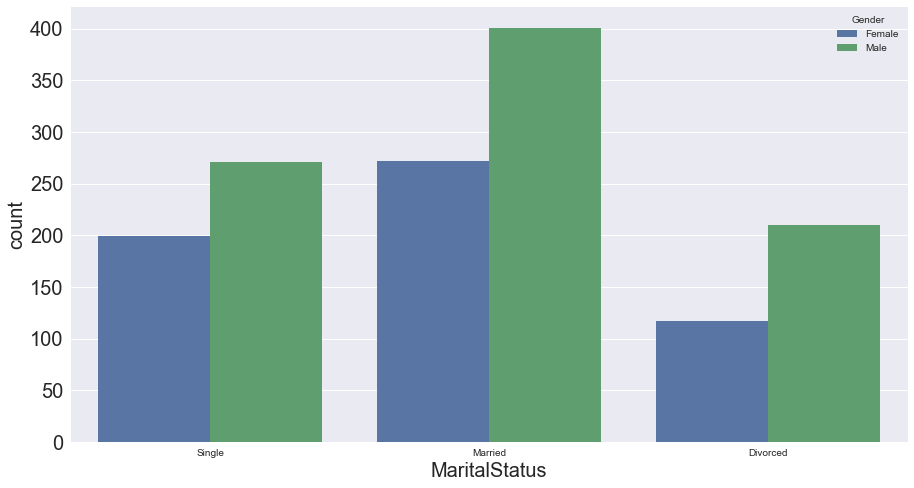

In [198]:
# MaritalStatus
plt.figure(figsize=(15,8))
sns.countplot('MaritalStatus', hue='Gender', data=data_)
plt.show()

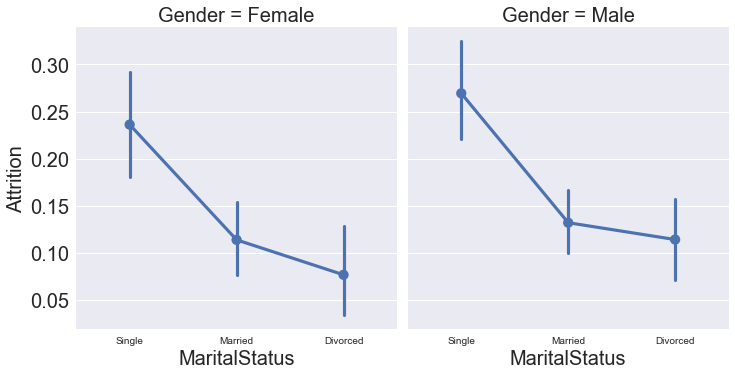

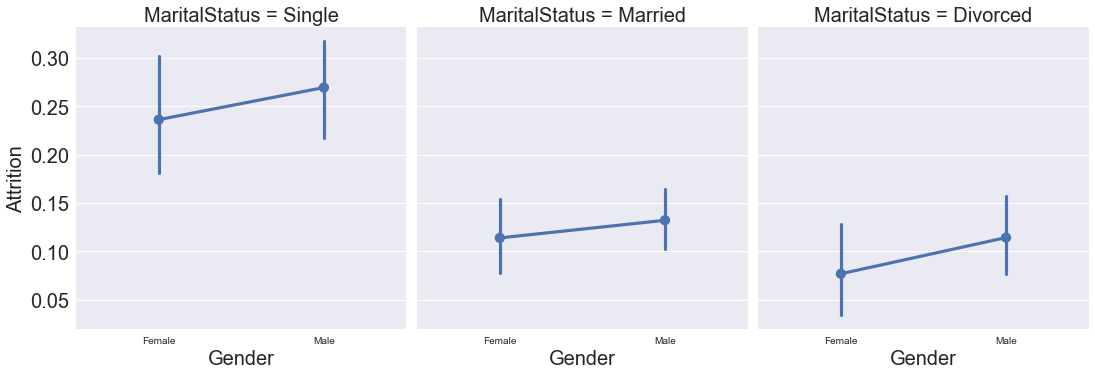

In [199]:
sns.factorplot('MaritalStatus', 'Attrition', col='Gender', data=data_)
sns.factorplot('Gender', 'Attrition', col='MaritalStatus', data=data_)
plt.show()

- 모든 결혼 상태에서 남성의 퇴사율이 높음
- 남성이며 single인 사람들의 퇴사율이 매우매우 높음

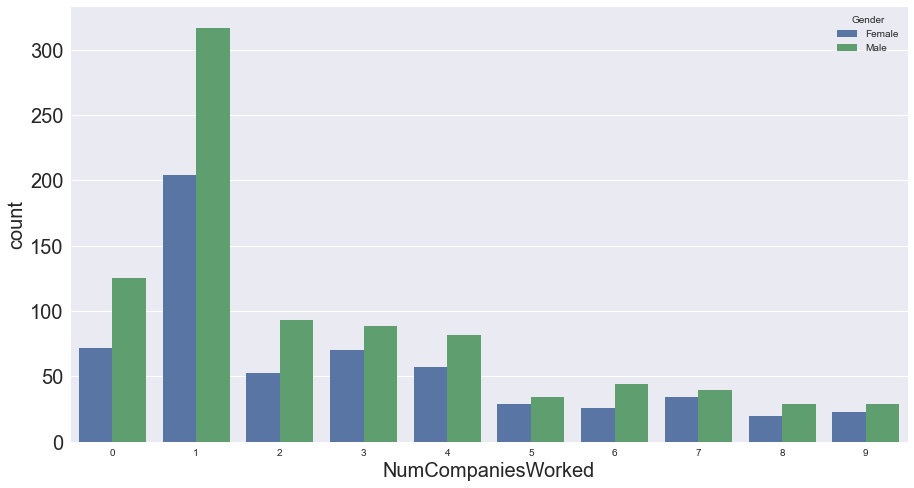

In [200]:
# NumCompaniesWorked
plt.figure(figsize=(15,8))
sns.countplot('NumCompaniesWorked', hue='Gender', data=data_)
plt.show()

- 분포 비슷

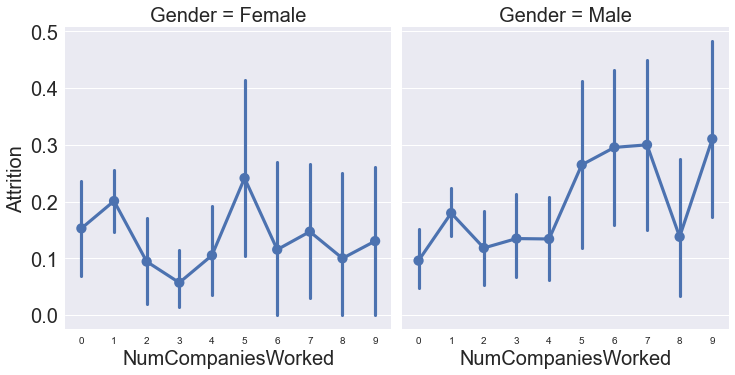

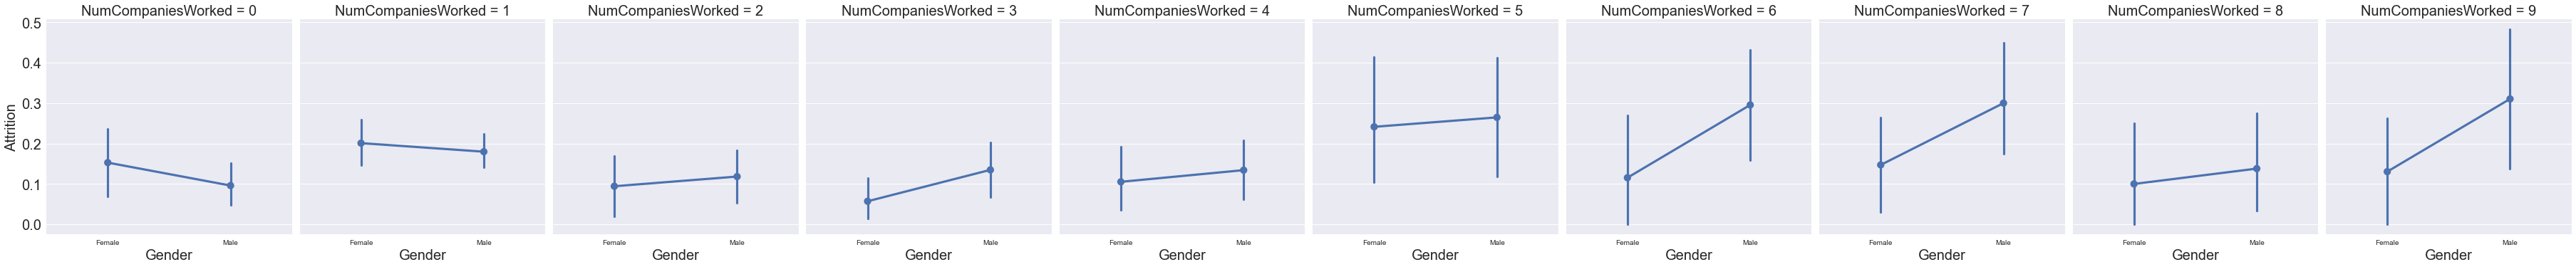

In [201]:
sns.factorplot('NumCompaniesWorked', 'Attrition', col='Gender', data=data_)
sns.factorplot('Gender', 'Attrition', col='NumCompaniesWorked', data=data_)
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

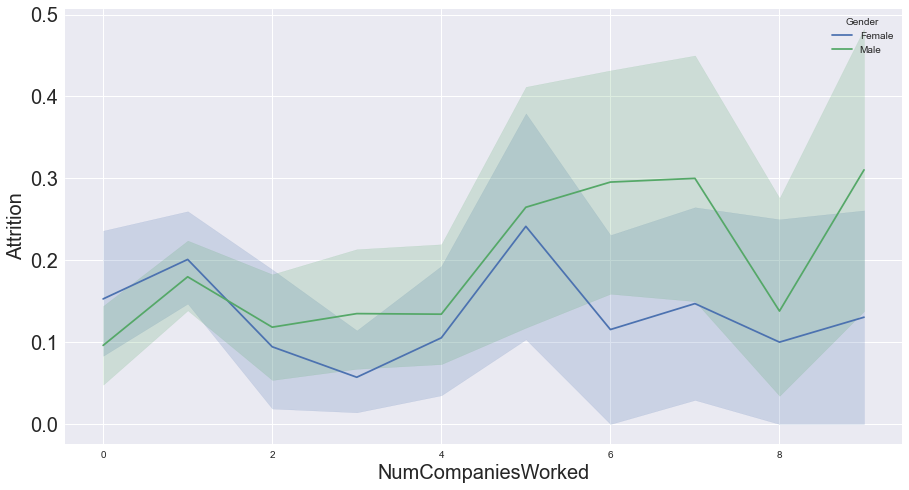

In [203]:
plt.figure(figsize=(15,8))
sns.lineplot('NumCompaniesWorked', 'Attrition', hue='Gender', data=data_)

- 여성들은 재직했던 회사 수가 큰 상관이 없어 보이지만 남성들은 재직했던 회사 수가 많아질수록 퇴사율이 높아짐

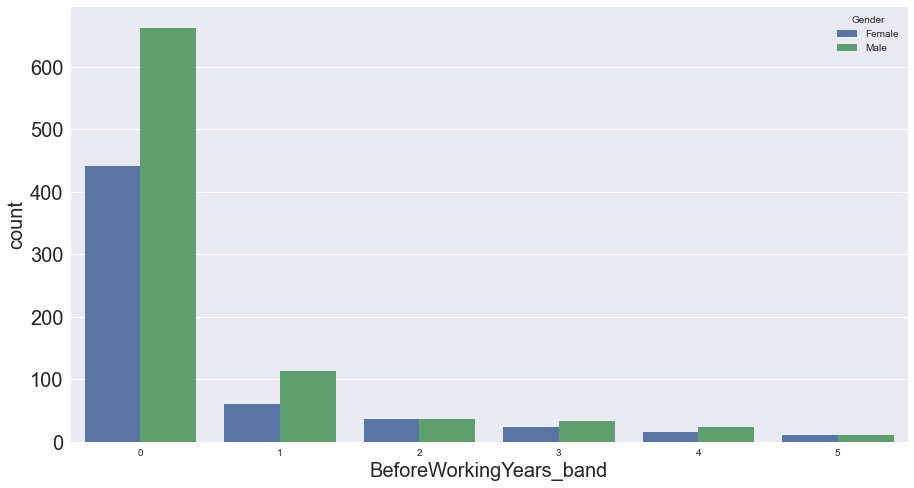

In [204]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='Gender', data=data_)
plt.show()

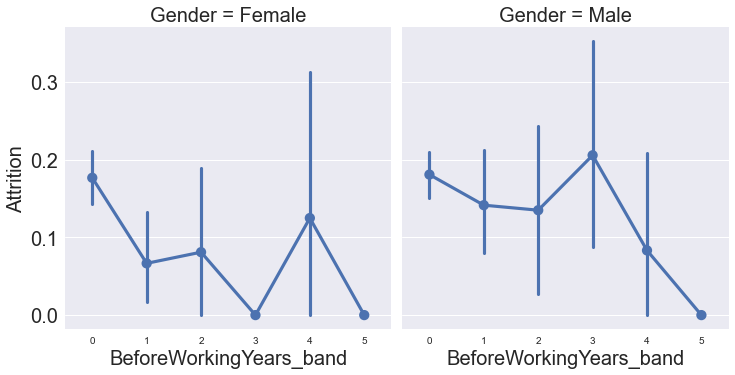

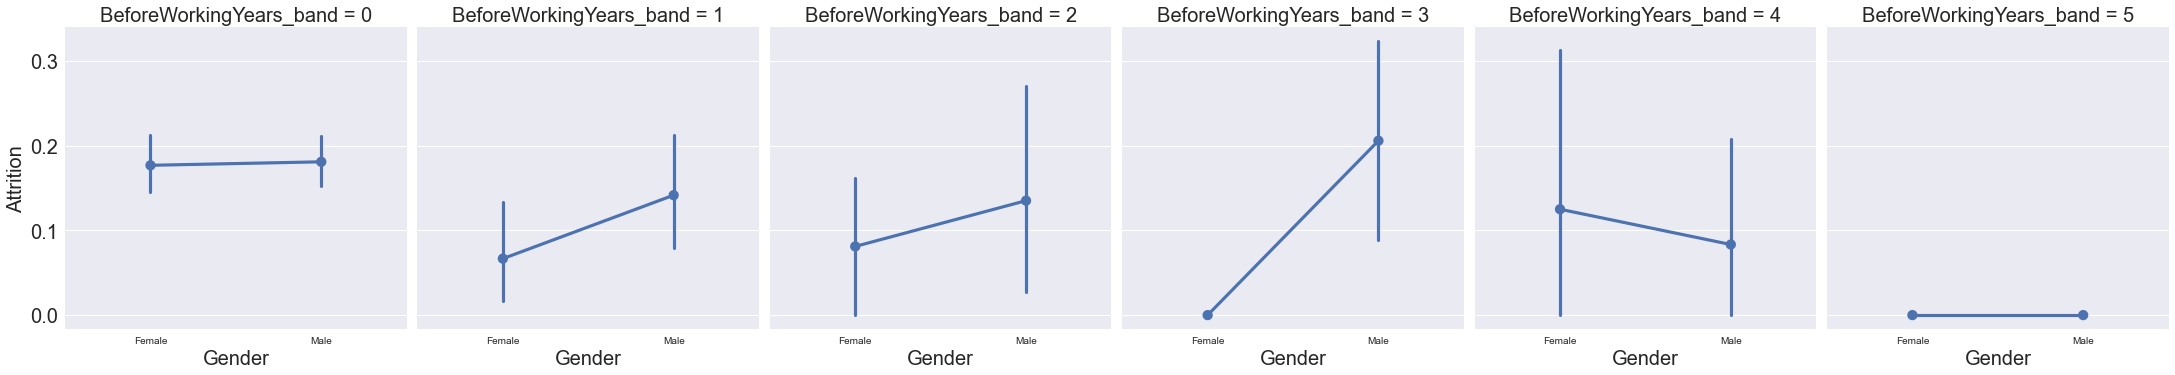

In [205]:
sns.factorplot('BeforeWorkingYears_band', 'Attrition', col='Gender', data=data_)
sns.factorplot('Gender', 'Attrition', col='BeforeWorkingYears_band', data=data_)
plt.show()

<AxesSubplot:xlabel='BeforeWorkingYears', ylabel='Attrition'>

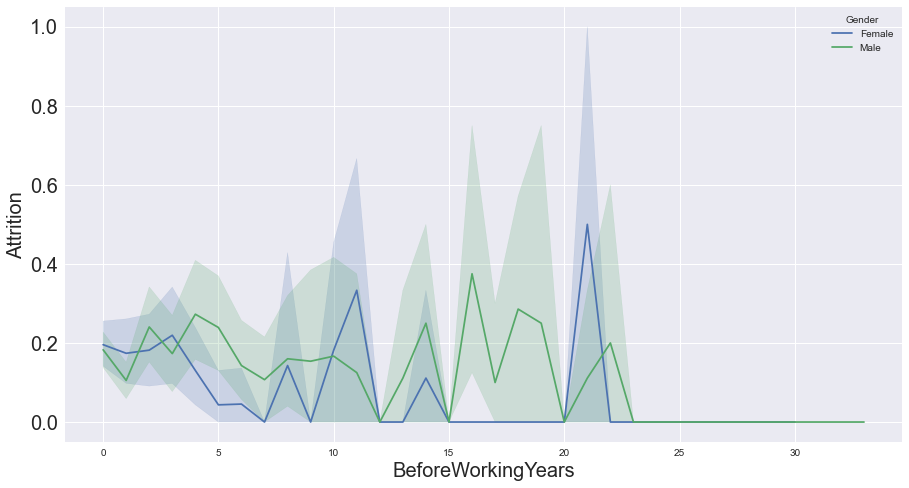

In [206]:
plt.figure(figsize=(15,8))
sns.lineplot('BeforeWorkingYears', 'Attrition', hue='Gender', data=data_)

- 걍 역시 경력이 짧을수록 퇴사율 높음

### MaritalStatus

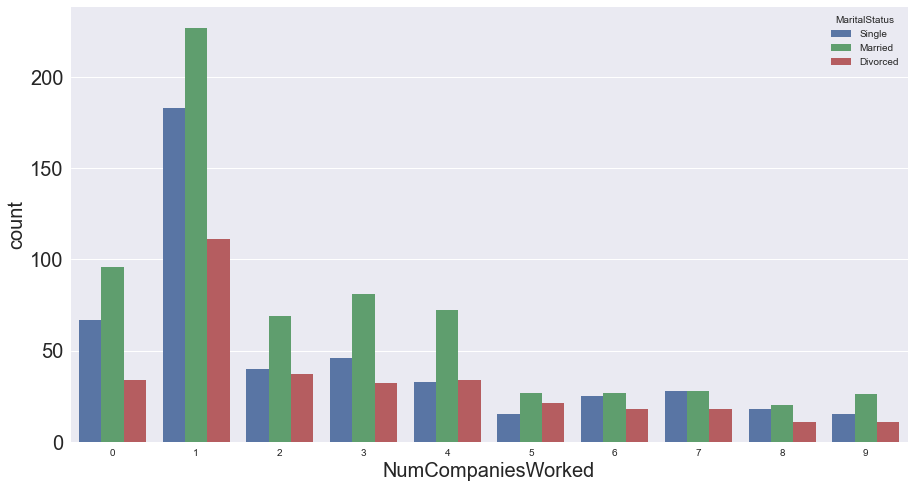

In [207]:
# NumCompaniesWorked
plt.figure(figsize=(15,8))
sns.countplot('NumCompaniesWorked', hue='MaritalStatus', data=data_)
plt.show()

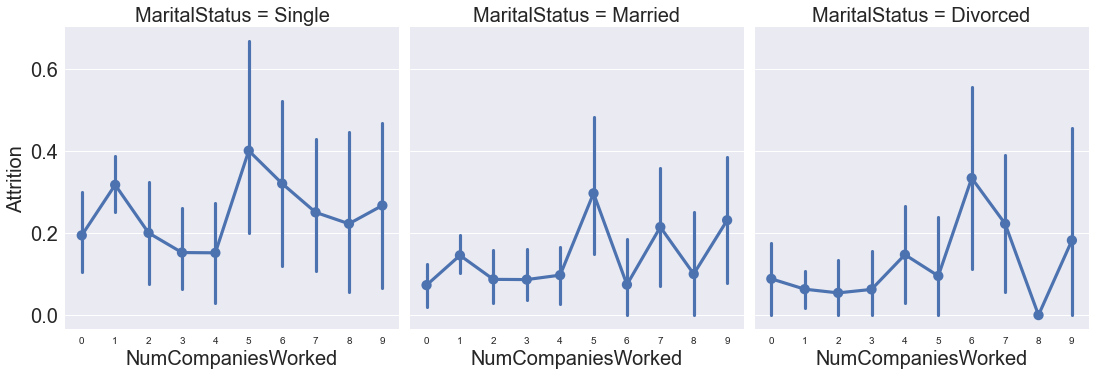

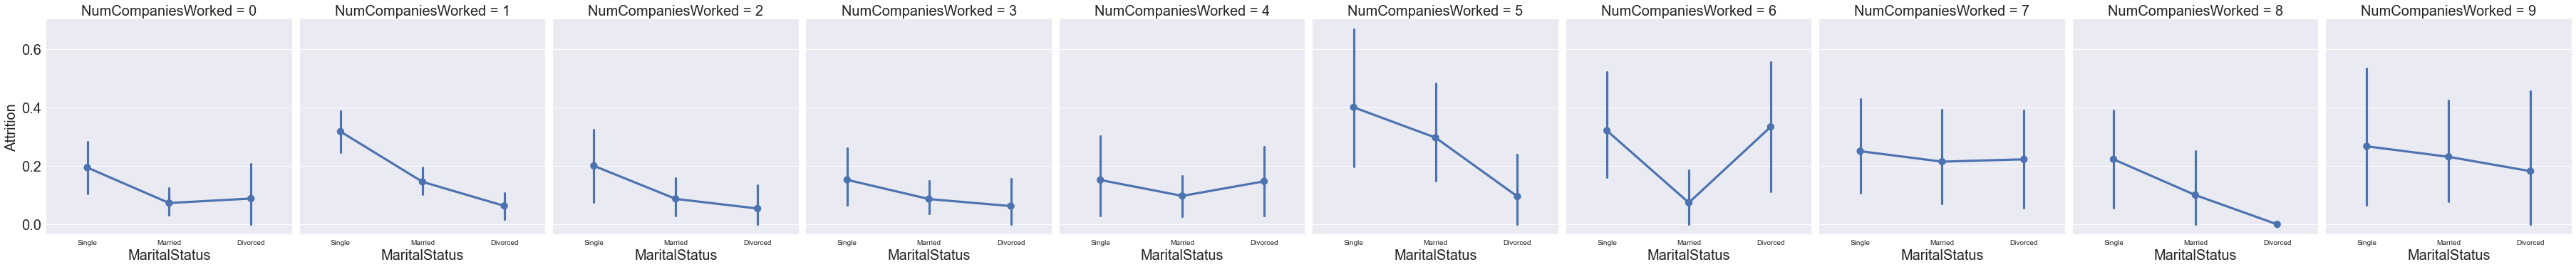

In [208]:
sns.factorplot('NumCompaniesWorked', 'Attrition', col='MaritalStatus', data=data_)
sns.factorplot('MaritalStatus', 'Attrition', col='NumCompaniesWorked', data=data_)
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

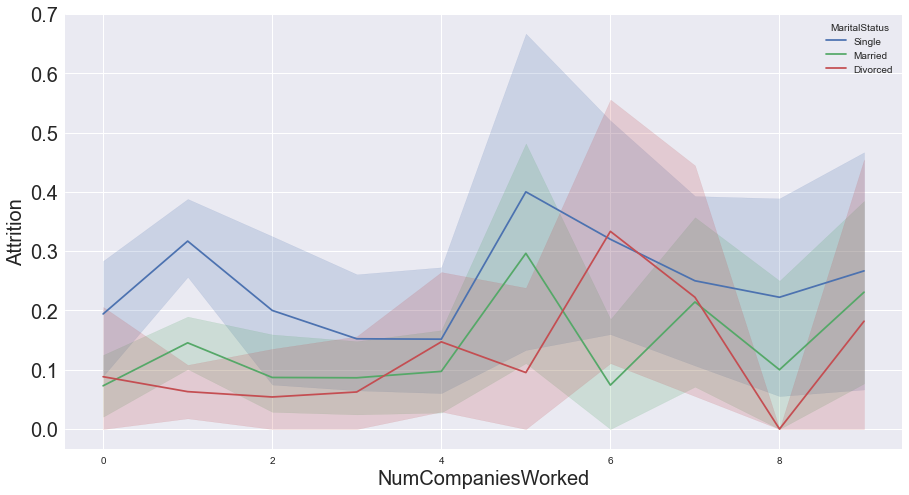

In [209]:
plt.figure(figsize=(15,8))
sns.lineplot('NumCompaniesWorked', 'Attrition', hue='MaritalStatus', data=data_)

- 역시 걍 single이 높음

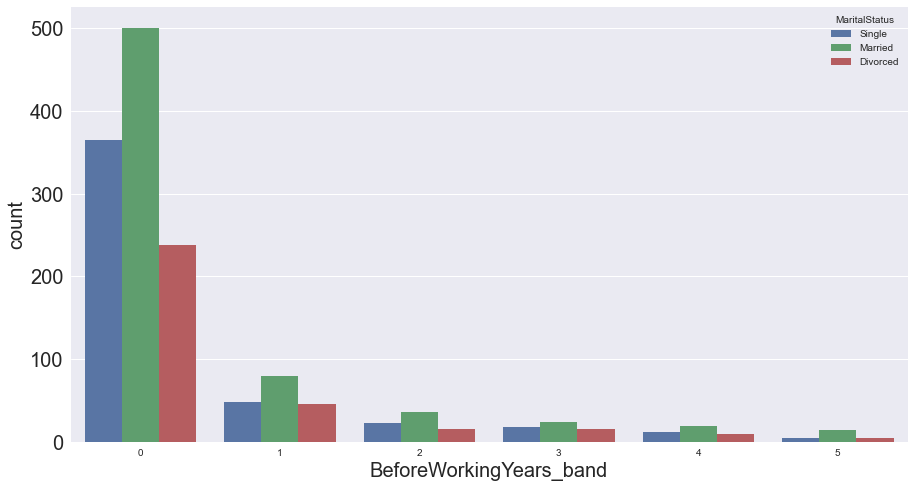

In [210]:
# BeforeWorkingYears
plt.figure(figsize=(15,8))
sns.countplot('BeforeWorkingYears_band', hue='MaritalStatus', data=data_)
plt.show()

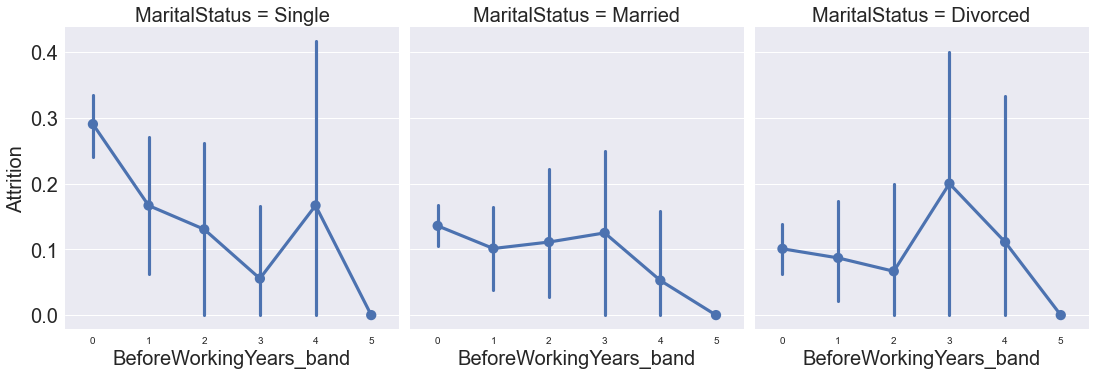

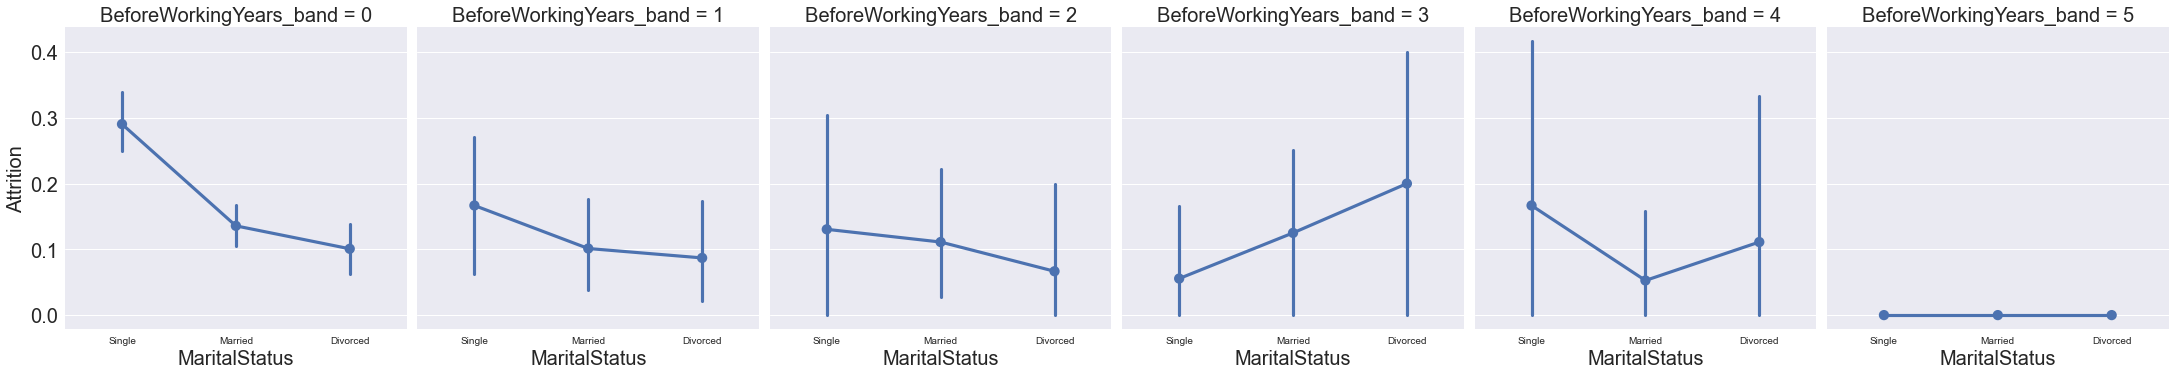

In [211]:
sns.factorplot('BeforeWorkingYears_band', 'Attrition', col='MaritalStatus', data=data_)
sns.factorplot('MaritalStatus', 'Attrition', col='BeforeWorkingYears_band', data=data_)
plt.show()

In [222]:
print(data_.MaritalStatus.value_counts())
print(data_.loc[(data_.MaritalStatus=='Divorced')&(data_.BeforeWorkingYears_band==3), 'BeforeWorkingYears_band'].count())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
15


- band 3에서 divorced가 많은 것은 걍 수가 적어서 그런 듯

<AxesSubplot:xlabel='BeforeWorkingYears', ylabel='Attrition'>

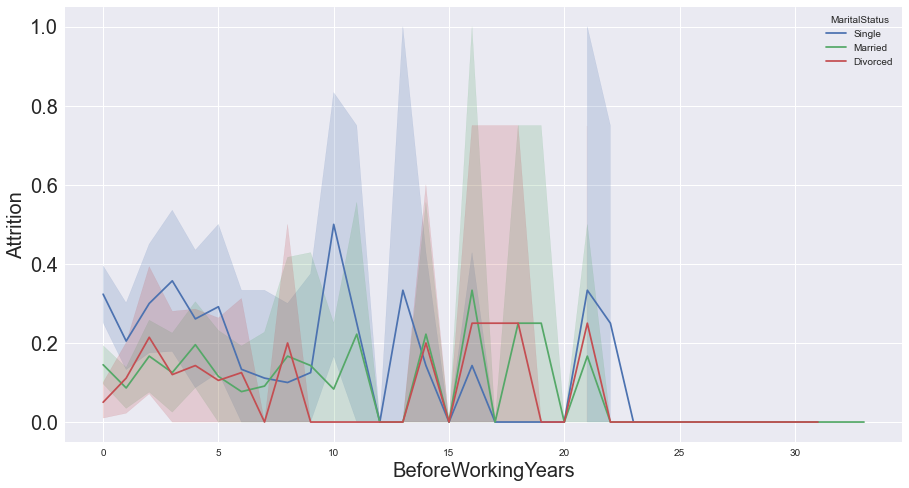

In [212]:
plt.figure(figsize=(15,8))
sns.lineplot('BeforeWorkingYears', 'Attrition', hue='MaritalStatus', data=data_)

- Single & 경력↓ 이퇴사율 높음

### NumCompaniesWorked & BeforeWorkingYears

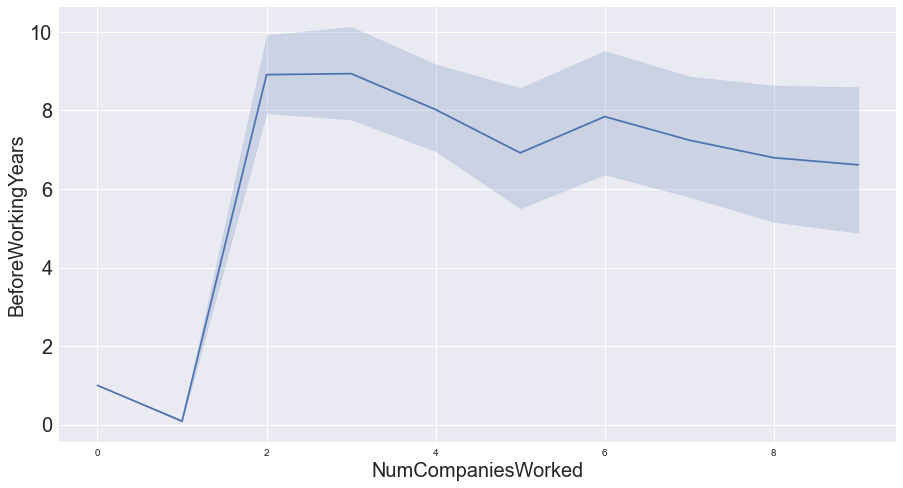

In [223]:
plt.figure(figsize=(15,8))
sns.lineplot('NumCompaniesWorked', 'BeforeWorkingYears', data=data_)
plt.show()

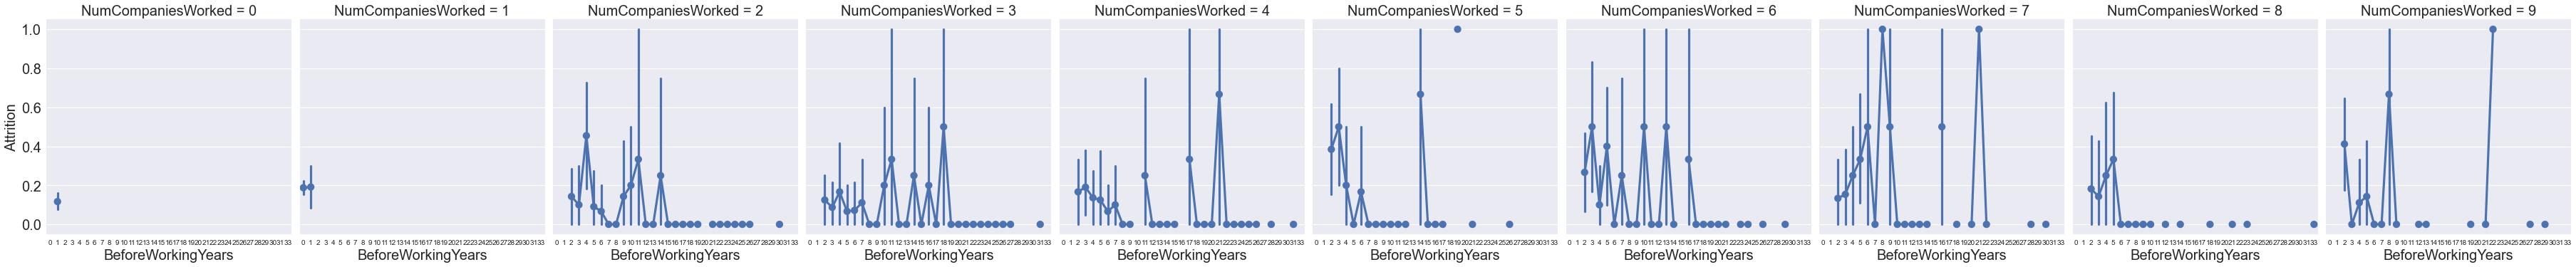

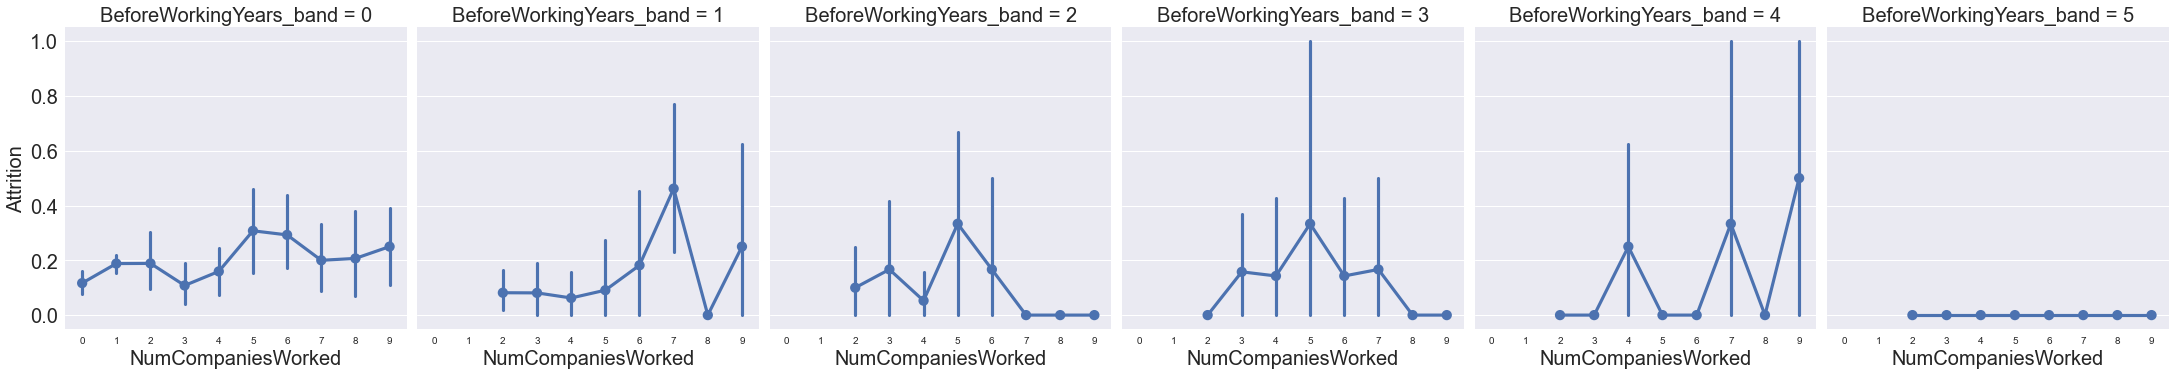

In [225]:
sns.factorplot('BeforeWorkingYears', 'Attrition', col='NumCompaniesWorked', data=data_)
sns.factorplot('NumCompaniesWorked', 'Attrition', col='BeforeWorkingYears_band', data=data_)
plt.show()

<AxesSubplot:xlabel='BeforeWorkingYears', ylabel='NumCompaniesWorked'>

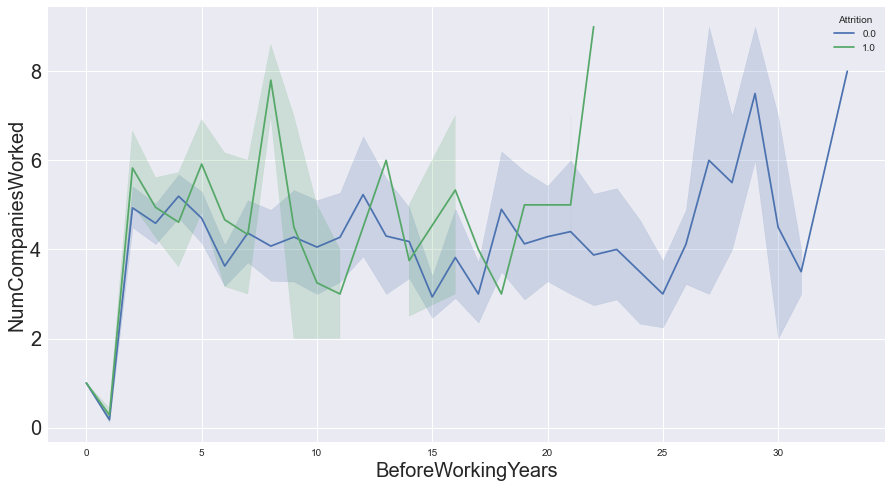

In [226]:
plt.figure(figsize=(15,8))
sns.lineplot('BeforeWorkingYears', 'NumCompaniesWorked', hue='Attrition', data=data_)

Text(0, 0.5, 'BeforeWorkingYears')

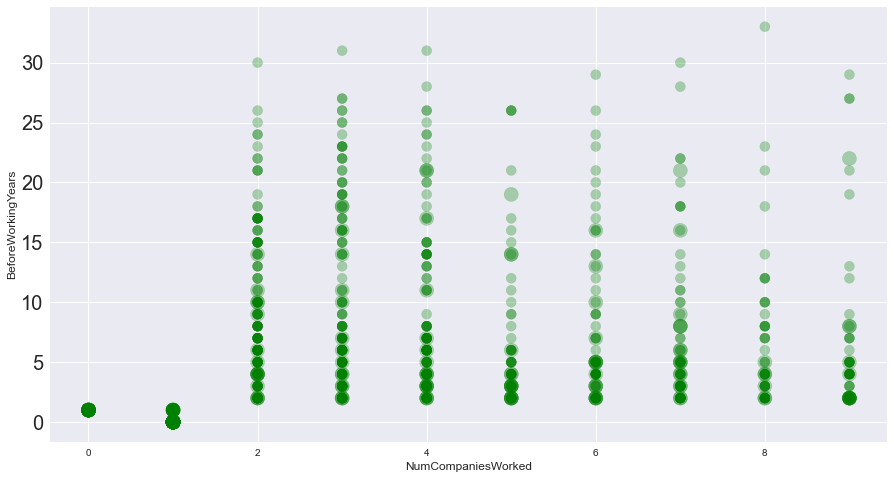

In [233]:
plt.figure(figsize=(15,8))
plt.scatter(y=data_['BeforeWorkingYears'], # x축
            x=data_['NumCompaniesWorked'], # y축
            s = (data_['Attrition']+1)*100, # 사이즈
            c = 'green', # 색깔(고정)
            alpha = 0.3) # 투명도
plt.xlabel('NumCompaniesWorked', size = 12)
plt.ylabel('BeforeWorkingYears', size = 12)

- 경력 짧을수록 퇴사율 높음
- 전 회사 수는 크게 관계는 없는 듯